<a href="https://colab.research.google.com/github/elewin2022/Data_Sci/blob/main/LAB_8_Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

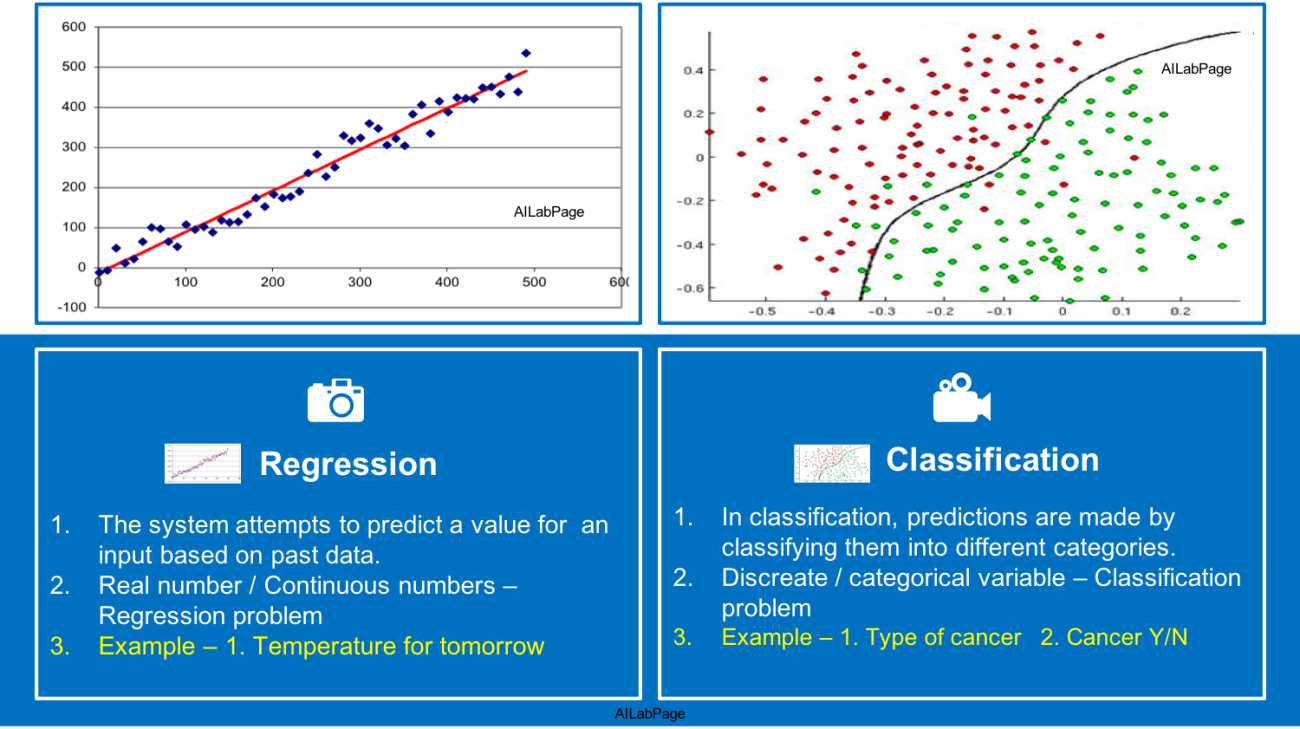

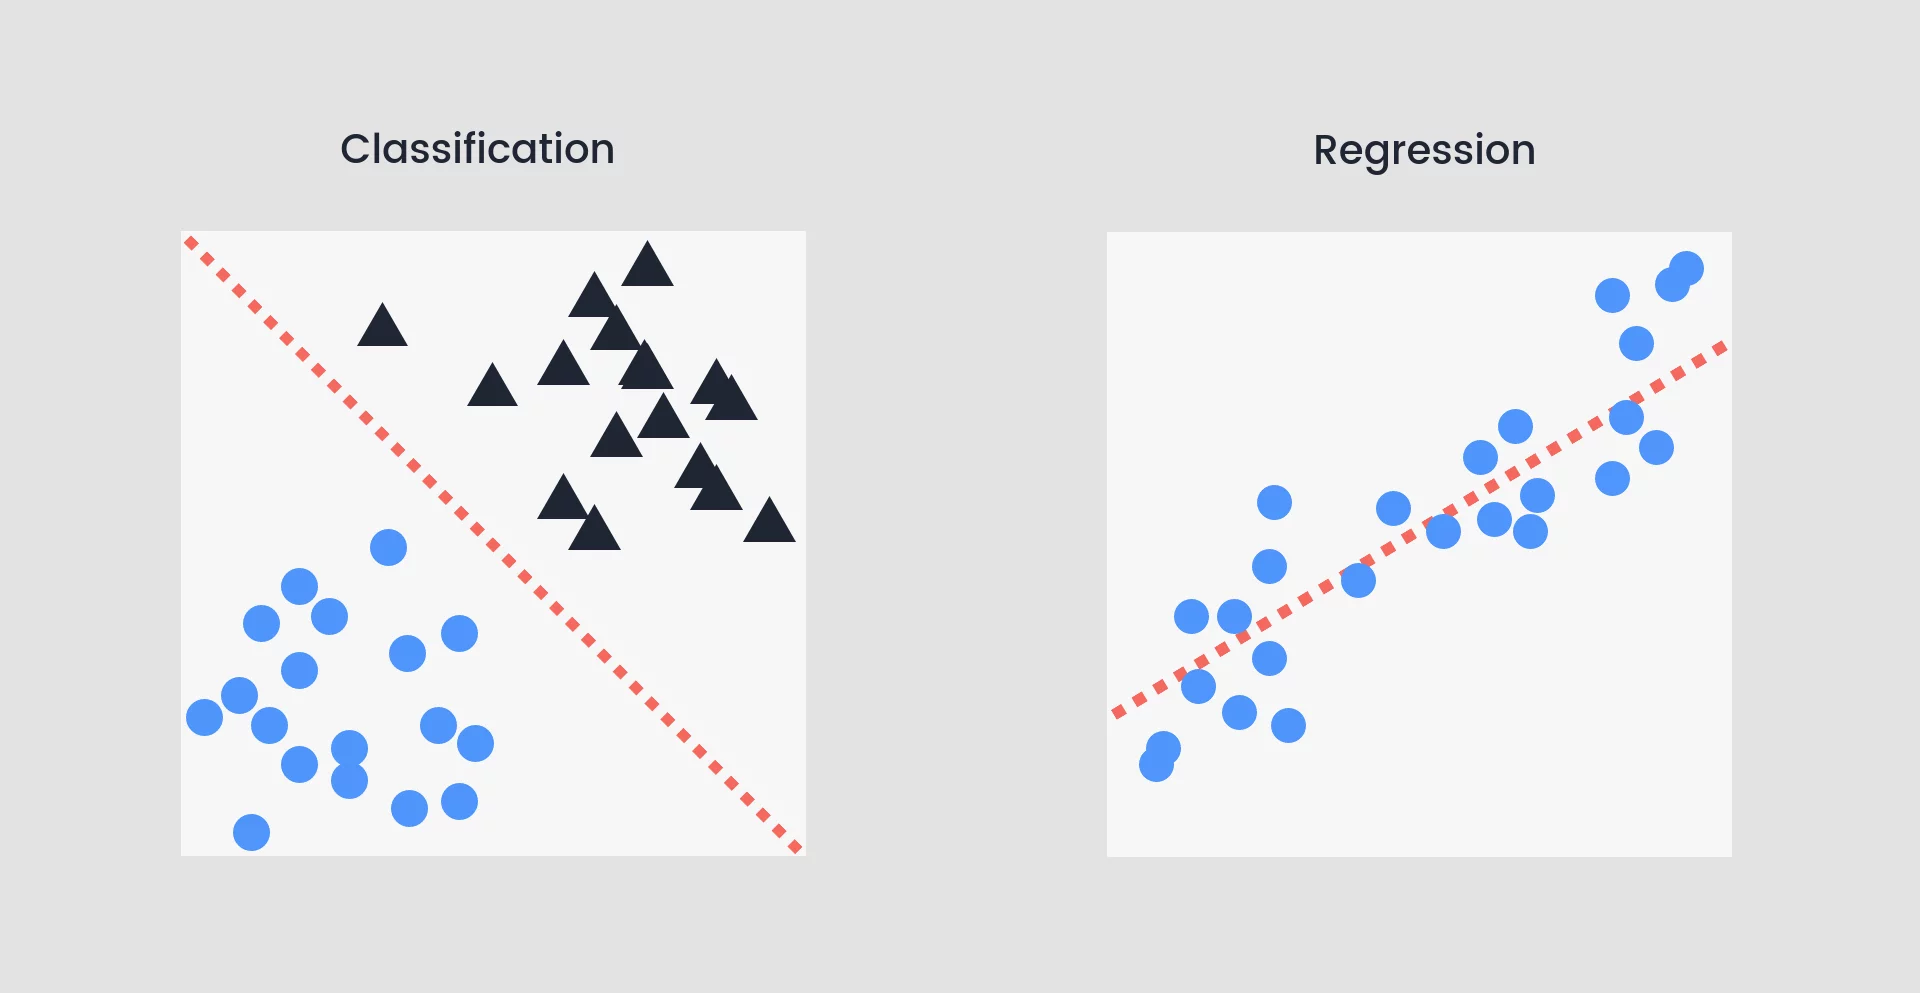

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

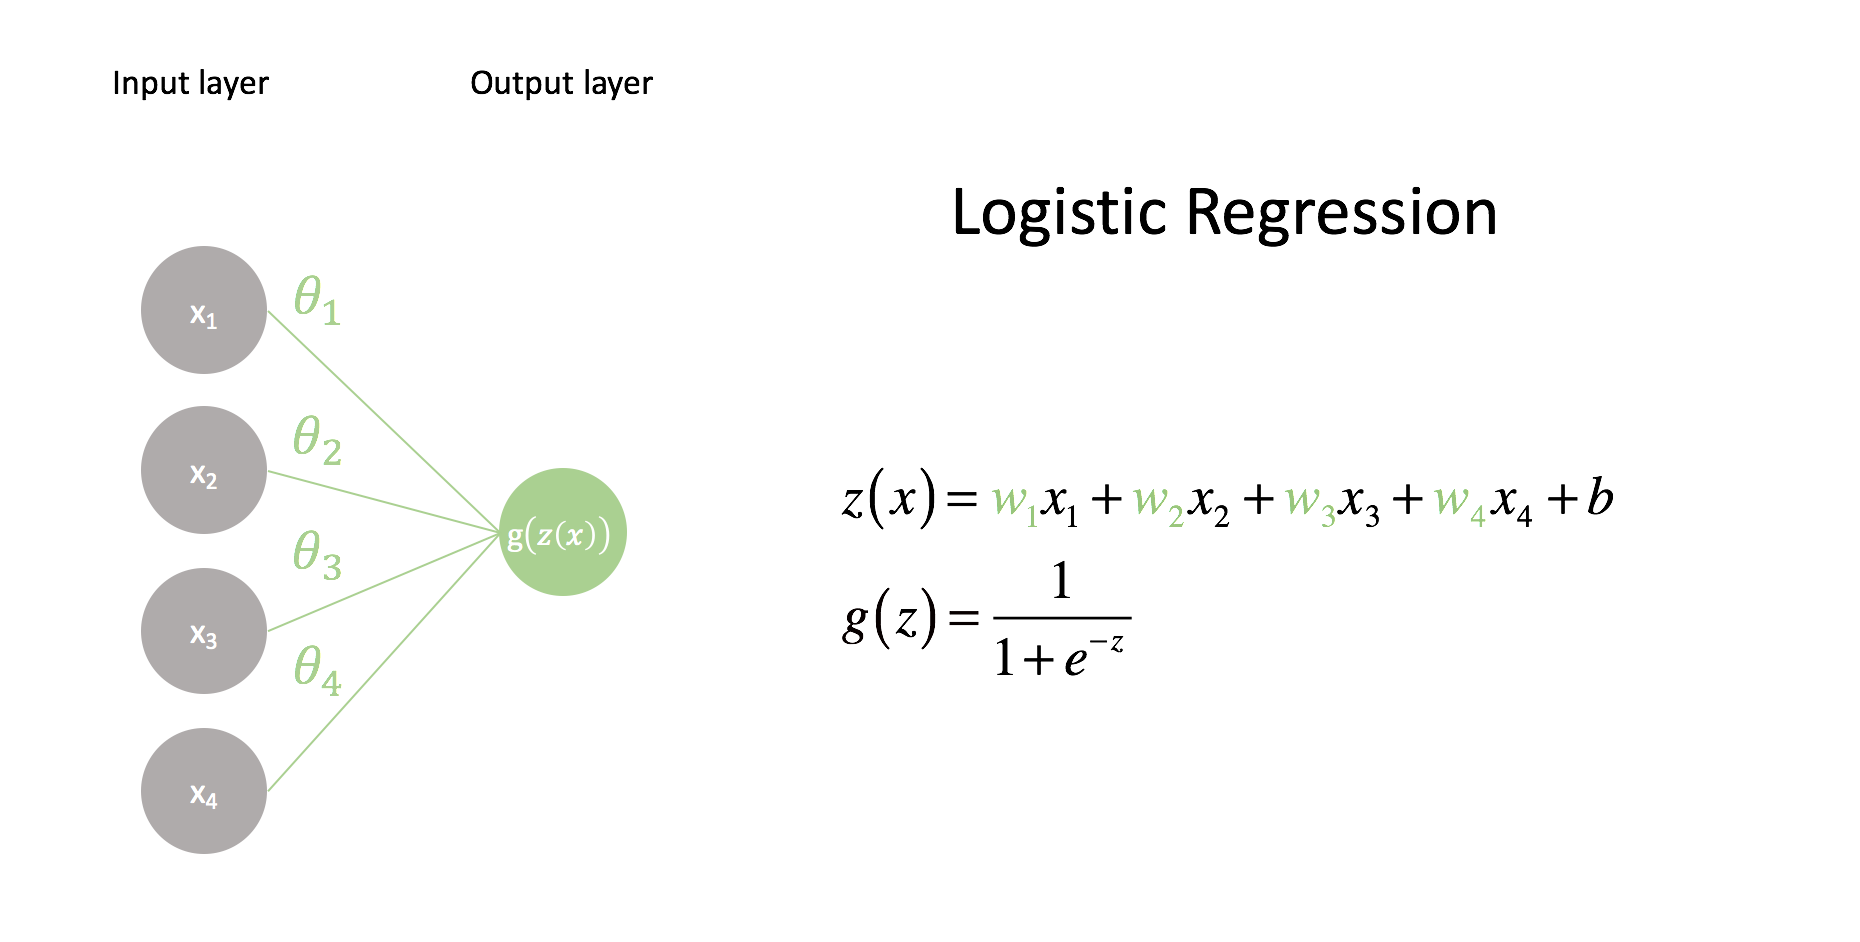

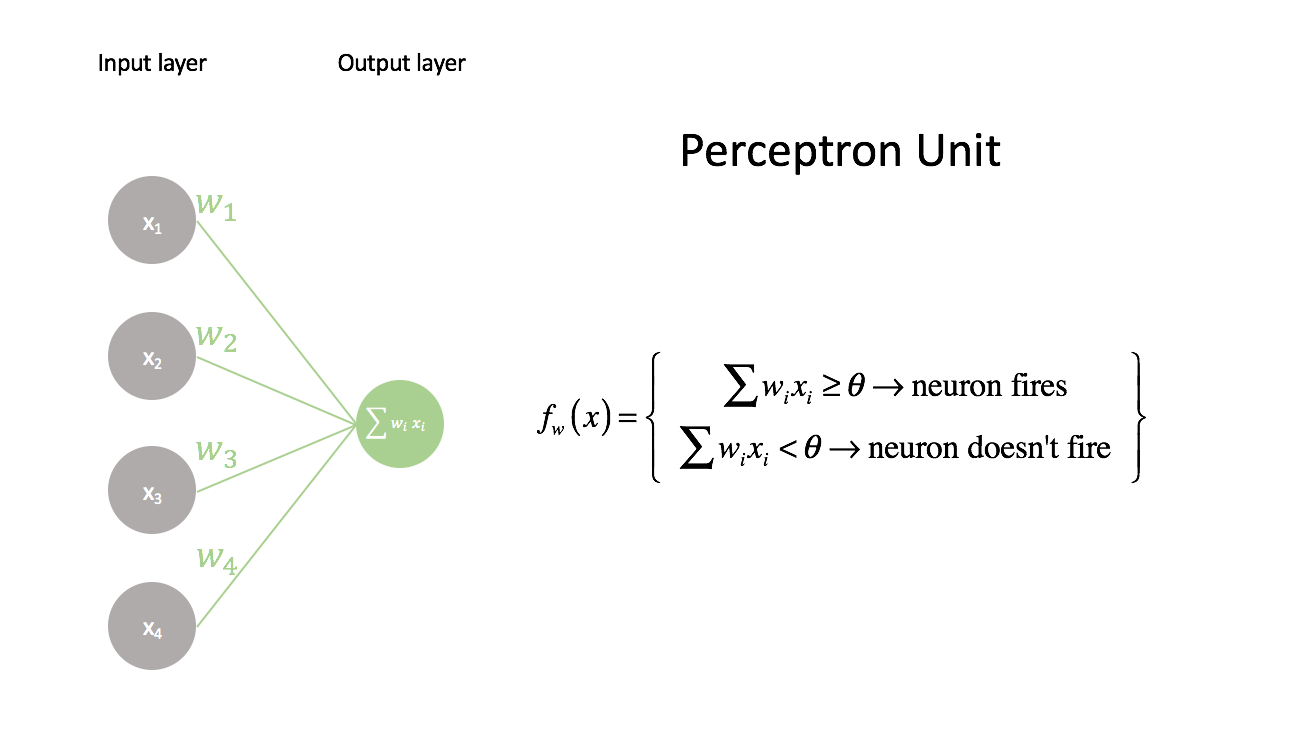

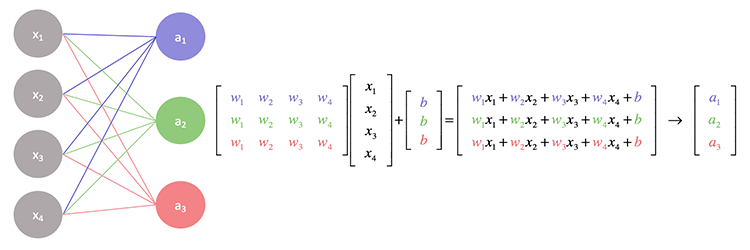

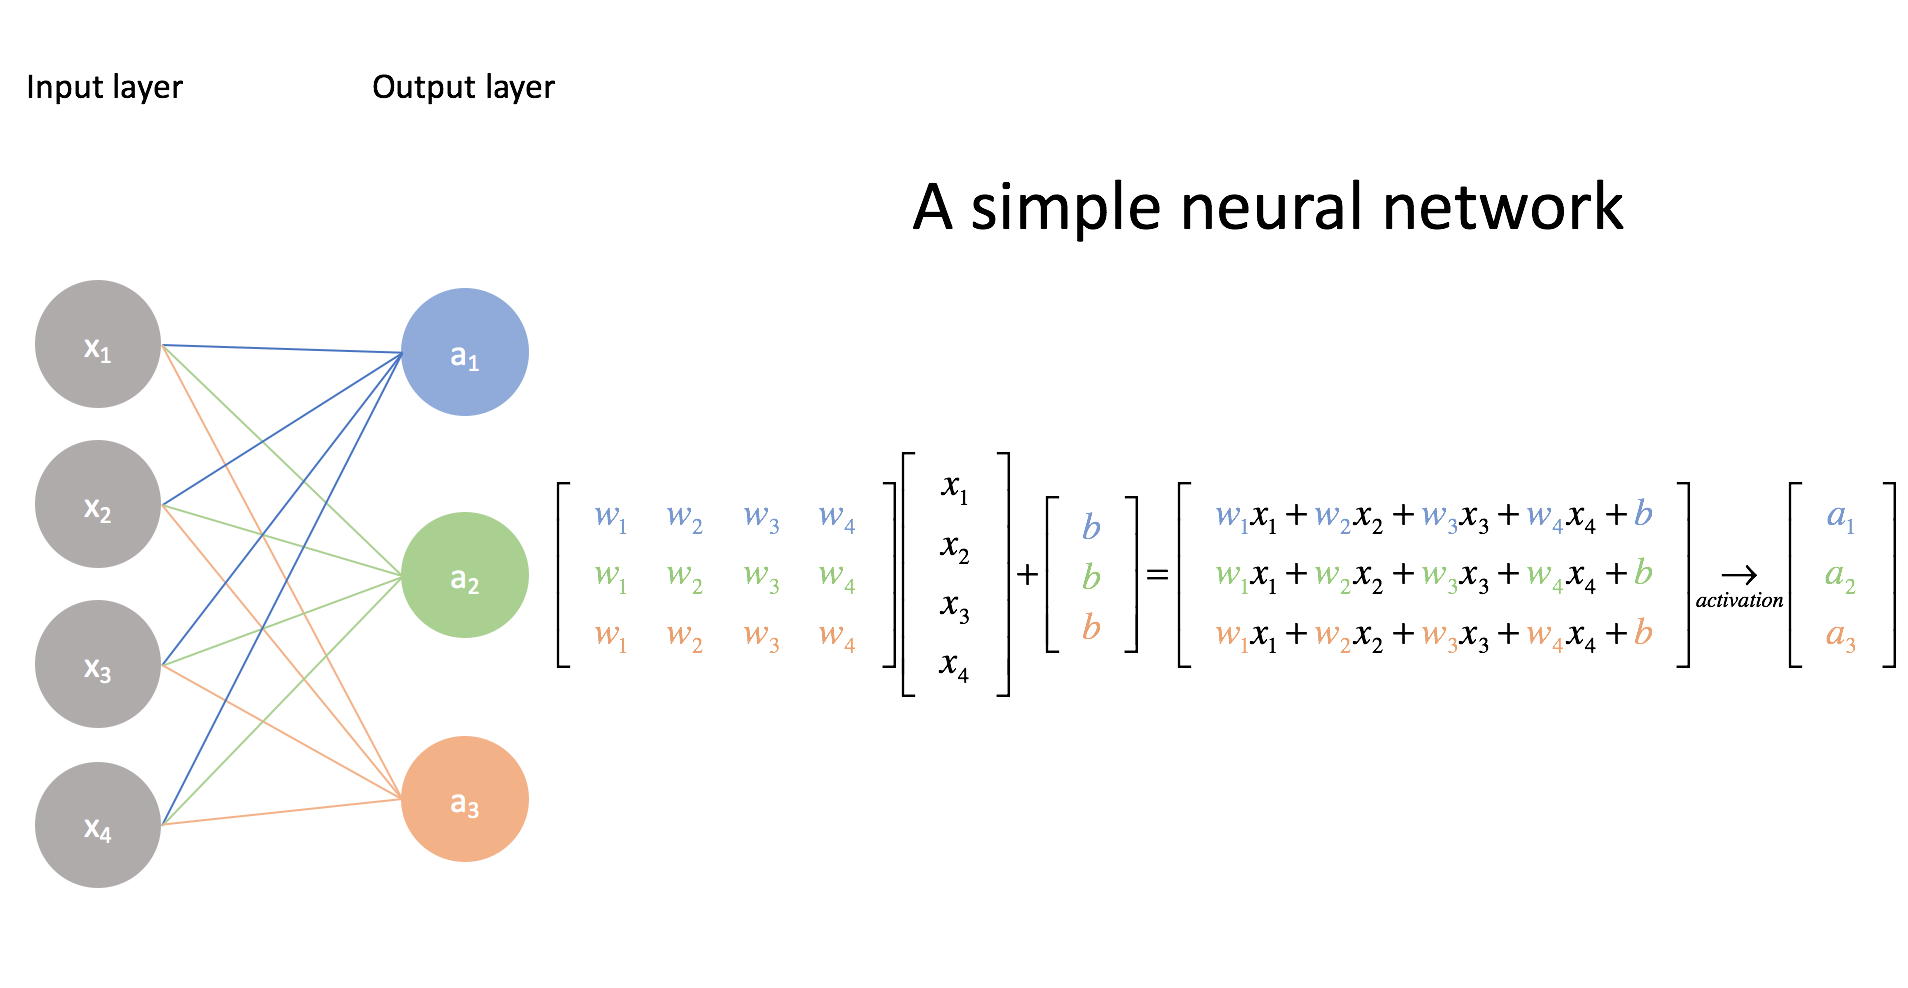

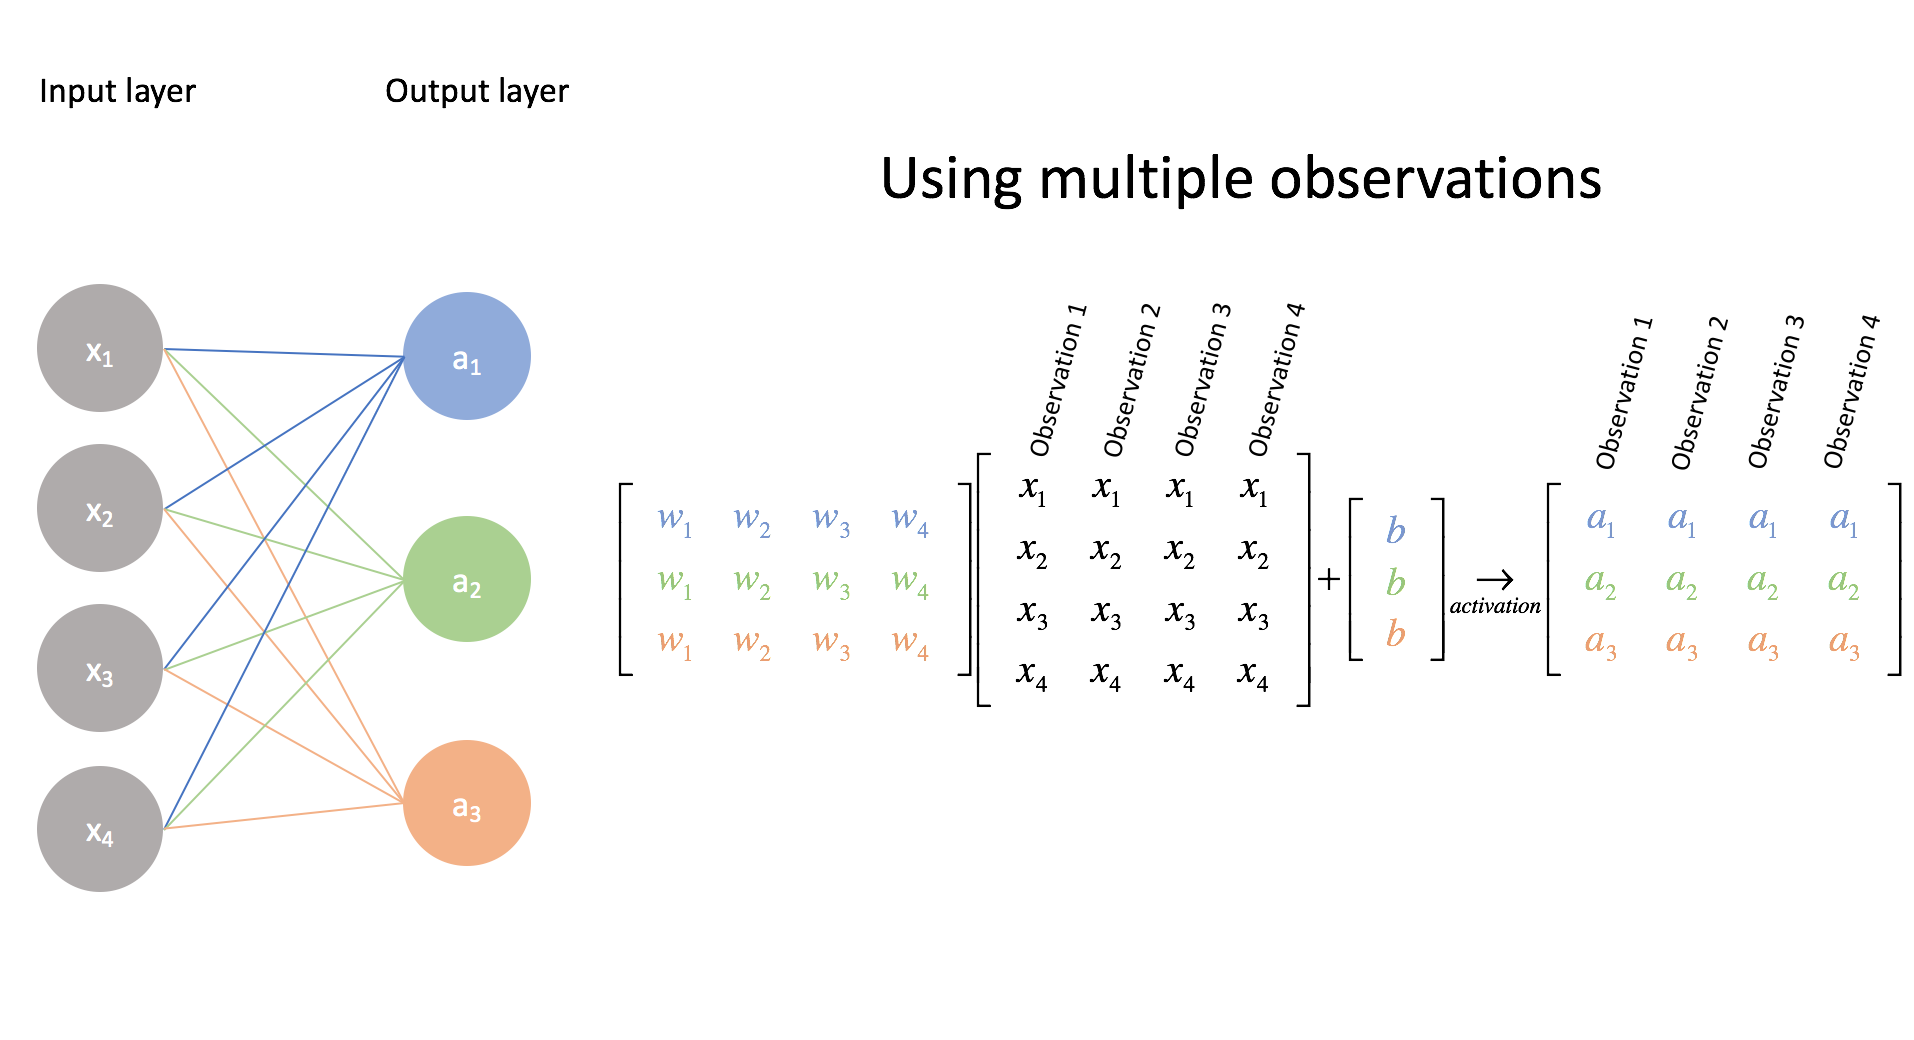

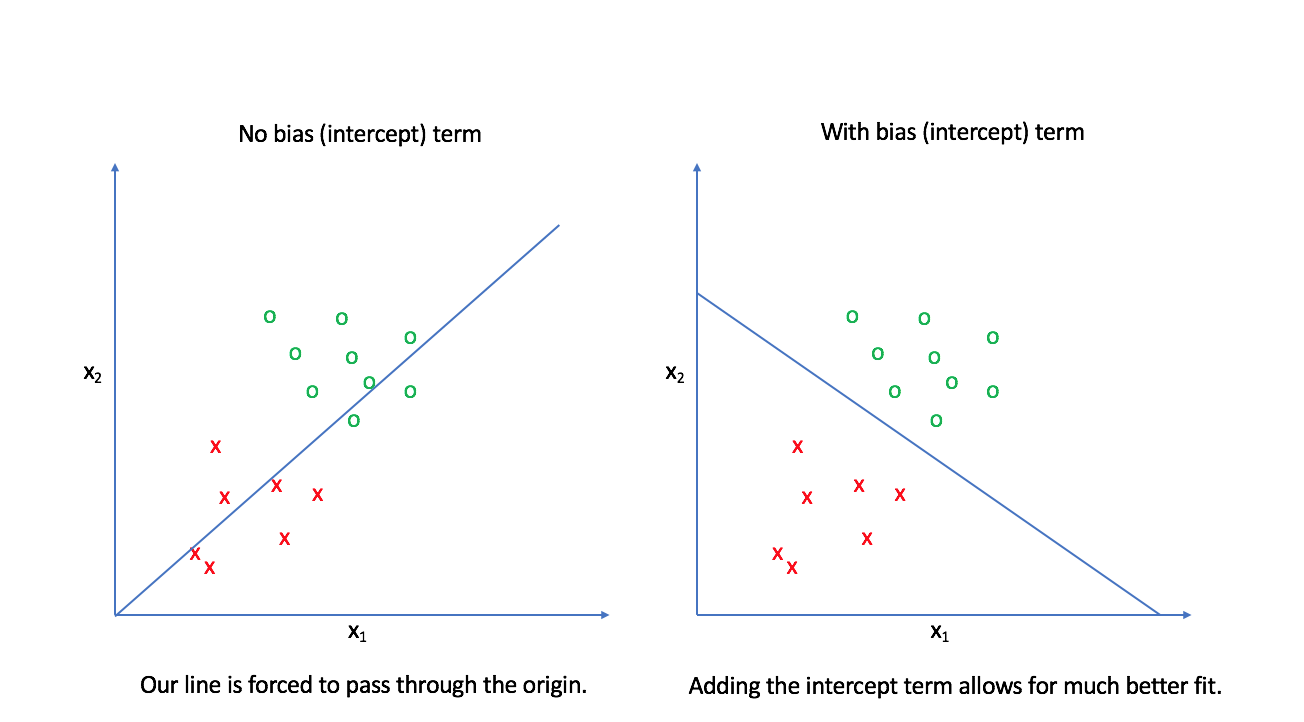

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-wu21dtd9
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-wu21dtd9
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7683 sha256=9320ca39974af2aed121c21e754206c854ca72bcf1d94be5d1c7837fc5912103
  Stored in directory: /tmp/pip-ephem-wheel-cache-6a0n_k1d/wheels/81/51/4e/93fa1b6f290ba71f589593454d4d769f9baebd8c4c376822d9
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e6e219fbfcfbaabbe7bab5f35e68af00fe83ea9576dbbae5b1f0f849d8916dff
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# $y=mx+b$

In [ ]:
x = np.arange(0,9)

In [ ]:
x.shape

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(9, 1)

In [ ]:
y = 3*x-5

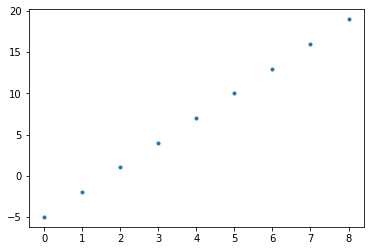

In [ ]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 363.6242980957031 1.3307735919952393 0.5606397390365601
1 178.39344787597656 1.6114518642425537 0.580732524394989
2 115.69029235839844 1.7761667966842651 0.5802547931671143
3 94.088134765625 1.873712420463562 0.5679262280464172
4 86.27686309814453 1.932347059249878 0.5487962365150452
5 83.09677124023438 1.9684361219406128 0.5257889032363892
6 81.4756851196289 1.9914573431015015 0.5005972981452942
7 80.3831558227539 2.006899833679199 0.47420161962509155
8 79.4735336303711 2.017942190170288 0.4471692144870758
9 78.63081359863281 2.02642560005188 0.419828325510025
10 77.81603240966797 2.033416271209717 0.39236876368522644
11 77.01606750488281 2.039531946182251 0.3649001717567444
12 76.2264633178711 2.0451300144195557 0.337485671043396
13 75.44567108154297 2.050417900085449 0.3101615607738495
14 74.6731185913086 2.055515766143799 0.2829485535621643
15 73.90856170654297 2.060492992401123 0.25585833191871643
16 73.15187072753906 2.065390110015869 0.22889737784862518
17 72.4029312133789 2.0

In [ ]:
loss.item()

0.002957175951451063

In [ ]:
m.item()

2.99405837059021

In [ ]:
b.item()

-4.96675443649292

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 106.05587768554688
2 1000 35.24900817871094
3 1000 15.122114181518555
4 1000 9.359444618225098
5 1000 7.668508052825928
6 1000 7.132226943969727
7 1000 6.923840045928955
8 1000 6.809027194976807
9 1000 6.721367359161377
10 1000 6.642030715942383
11 1000 6.565674304962158
12 1000 6.490772724151611
13 1000 6.416890621185303
14 1000 6.343896865844727
15 1000 6.271744728088379
16 1000 6.200418472290039
17 1000 6.129903793334961
18 1000 6.060190677642822
19 1000 5.991271495819092
20 1000 5.923136234283447
21 1000 5.855775833129883
22 1000 5.789180755615234
23 1000 5.723343372344971
24 1000 5.658255100250244
25 1000 5.593905925750732
26 1000 5.530289173126221
27 1000 5.467395782470703
28 1000 5.405218124389648
29 1000 5.343747138977051
30 1000 5.282975673675537
31 1000 5.22289514541626
32 1000 5.1634979248046875
33 1000 5.104776382446289
34 1000 5.046722412109375
35 1000 4.989328384399414
36 1000 4.932587623596191
37 1000 4.876491546630859
38 1000 4.821033477783203
39 1000 4.766206741

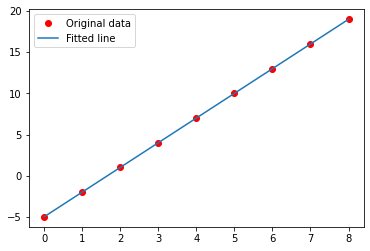

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9971]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-4.9836], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

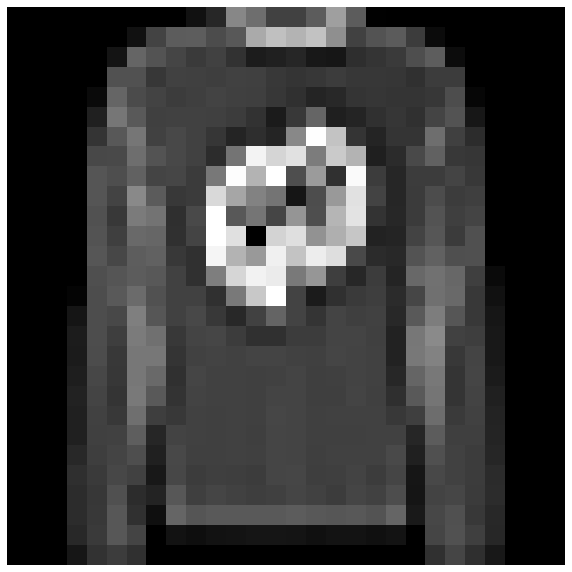

In [ ]:
plot(X[123,0,0:28,0:28])

In [ ]:
Y[123]

2

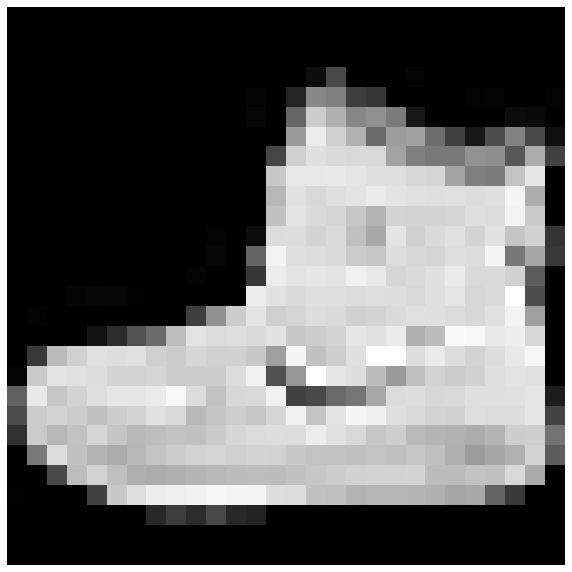

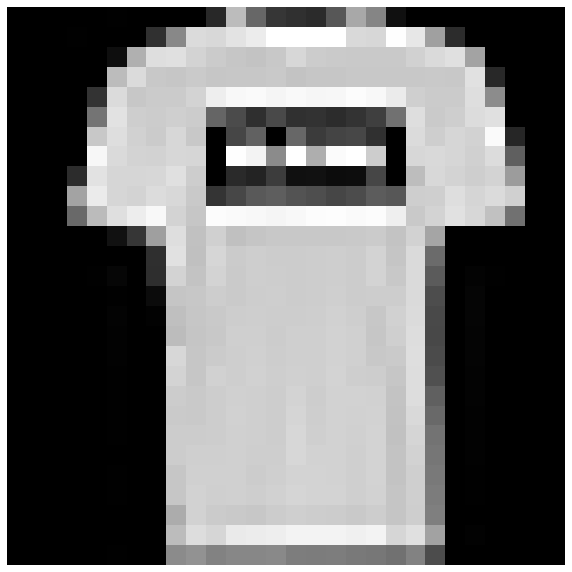

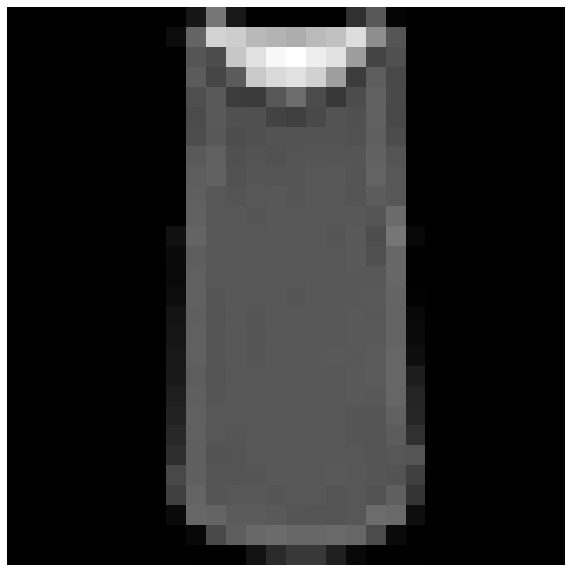

In [ ]:
for i in range(3):
    plot(X[i,0,:,:])

In [ ]:
Y

array([9, 0, 0, ..., 3, 0, 5])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

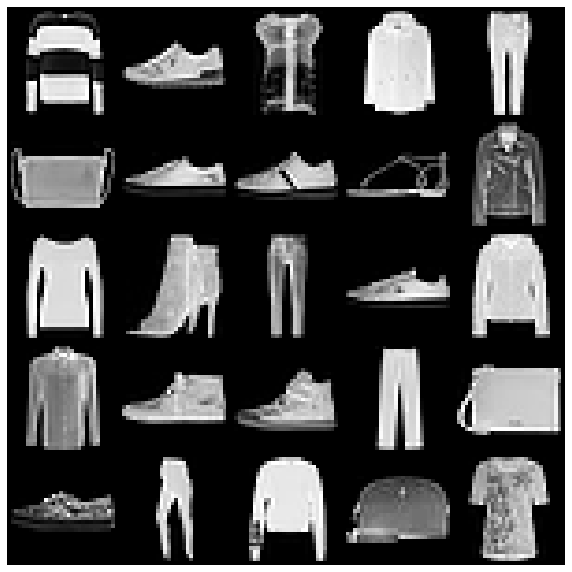

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28

784

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

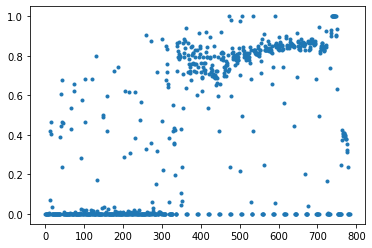

In [ ]:
plt.plot(X[100],'.')

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (1).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape #essentially template patterns, going to multiply data by matrix W and it will give us a value or labl of what image should be #matrix is 784x10

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

In [ ]:
plot(W[0:784,:10]

SyntaxError: ignored

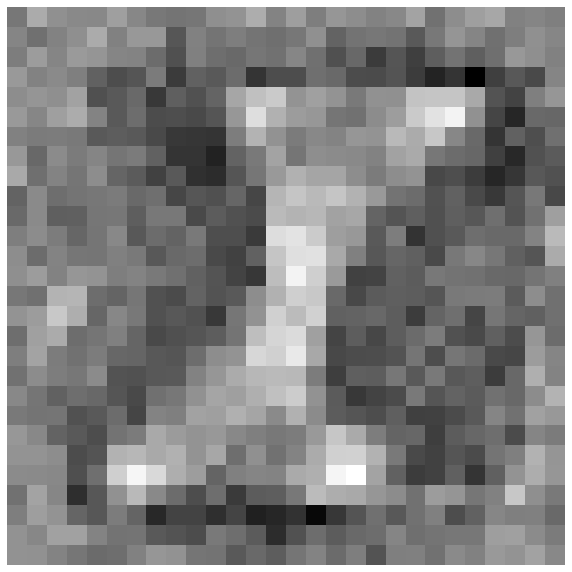

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

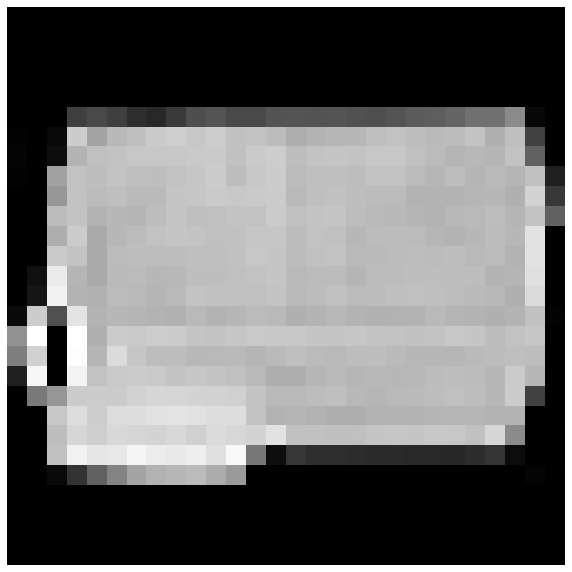

In [ ]:
plot(x[0].reshape(28,28))

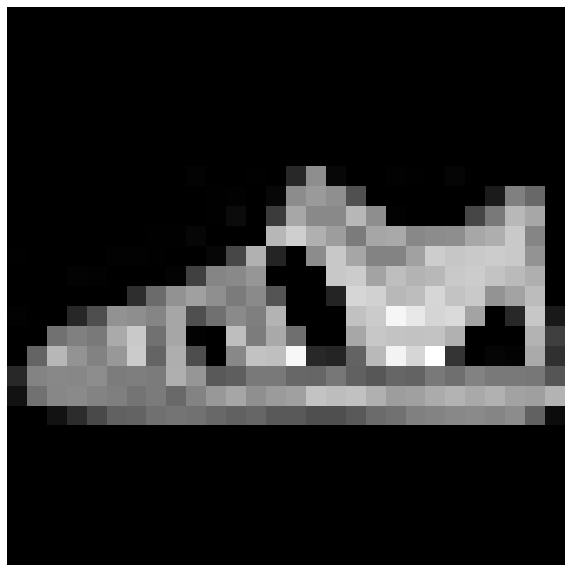

In [ ]:
plot(x[1].reshape(28,28))

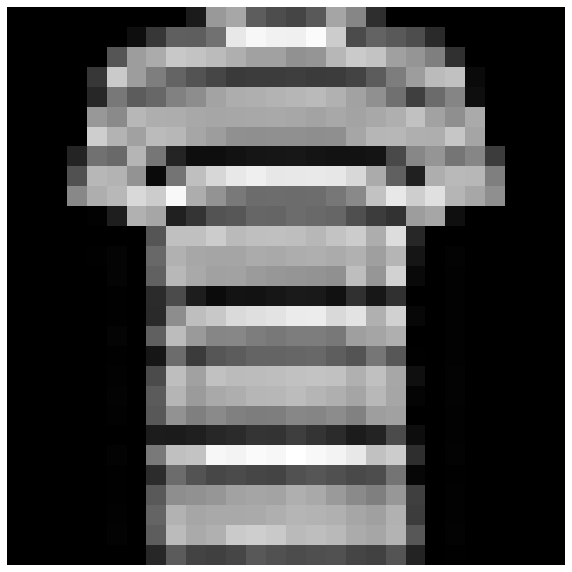

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y #answer key 

tensor([8., 5., 0., 3., 5., 6., 5., 3., 5., 5., 0., 1., 4., 7., 4., 7., 8., 5.,
        3., 3., 2., 4., 2., 5., 5., 0., 5., 7., 6., 6., 7., 1., 7., 6., 5., 1.,
        4., 1., 8., 1., 2., 3., 0., 3., 9., 0., 6., 5., 3., 0., 7., 1., 2., 4.,
        5., 2., 1., 5., 1., 9., 3., 8., 3., 9., 2., 2., 0., 7., 9., 0., 0., 9.,
        8., 6., 1., 5., 1., 7., 4., 3., 3., 4., 7., 6., 2., 5., 8., 8., 6., 7.,
        6., 9., 6., 4., 2., 2., 0., 0., 8., 3., 4., 9., 3., 5., 3., 9., 5., 2.,
        8., 1., 4., 1., 1., 8., 8., 1., 7., 6., 3., 2., 2., 5., 2., 4., 5., 5.,
        6., 5., 2., 4., 5., 2., 9., 0., 2., 6., 2., 7., 9., 6., 5., 5., 7., 8.,
        7., 5., 8., 5., 8., 6., 4., 9., 0., 4., 0., 0., 6., 3., 8., 4., 7., 0.,
        3., 4., 0., 2., 4., 0., 0., 8., 5., 7., 8., 8., 4., 9., 5., 9., 1., 7.,
        5., 0., 5., 0., 7., 2., 1., 0., 7., 5., 0., 5., 5., 9., 5., 7., 2., 6.,
        9., 9., 2., 2., 4., 8., 8., 4., 7., 4., 5., 4., 3., 9., 4., 4., 2., 6.,
        0., 0., 4., 5., 7., 2., 9., 8., 

In [ ]:
x.shape, W.shape #1,000 samples from data and data happens to have 784 inputs, our model W has the exact same number, have to consider them, linear regression only had one m, in this case we essentially have 784 ms, one for each one, if inside numbers match then we can multiply those two mattrices 

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape #shortcut @ does matrix multiplier, each 1000 has 10 numbers and that will tell us clasification for the digit

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W #

22 µs ± 248 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[-12.6797, -38.9504,  -2.4255,  ..., -18.2107, -19.2547, -40.2818],
        [ -5.7040, -15.3958,   2.5801,  ..., -11.5463, -12.4364, -13.8181],
        [-18.3813, -25.1733,  -9.3046,  ...,  -5.0609, -10.5343, -13.8693],
        ...,
        [-25.3475, -47.4212,  -9.3851,  ..., -20.9845, -28.9256, -32.0378],
        [ -6.5325, -21.9674,   3.8695,  ..., -27.5703,  -8.5602, -30.2495],
        [ -6.7432, -31.6734,  13.0705,  ..., -27.1004, -25.0878, -27.8558]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W #essentially mx, same formula y=mx

In [ ]:
y2.shape

torch.Size([1000, 10])

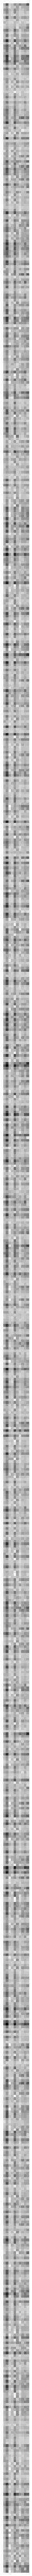

In [ ]:
plot(y2)

In [ ]:
y

tensor([8., 5., 0., 3., 5., 6., 5., 3., 5., 5., 0., 1., 4., 7., 4., 7., 8., 5.,
        3., 3., 2., 4., 2., 5., 5., 0., 5., 7., 6., 6., 7., 1., 7., 6., 5., 1.,
        4., 1., 8., 1., 2., 3., 0., 3., 9., 0., 6., 5., 3., 0., 7., 1., 2., 4.,
        5., 2., 1., 5., 1., 9., 3., 8., 3., 9., 2., 2., 0., 7., 9., 0., 0., 9.,
        8., 6., 1., 5., 1., 7., 4., 3., 3., 4., 7., 6., 2., 5., 8., 8., 6., 7.,
        6., 9., 6., 4., 2., 2., 0., 0., 8., 3., 4., 9., 3., 5., 3., 9., 5., 2.,
        8., 1., 4., 1., 1., 8., 8., 1., 7., 6., 3., 2., 2., 5., 2., 4., 5., 5.,
        6., 5., 2., 4., 5., 2., 9., 0., 2., 6., 2., 7., 9., 6., 5., 5., 7., 8.,
        7., 5., 8., 5., 8., 6., 4., 9., 0., 4., 0., 0., 6., 3., 8., 4., 7., 0.,
        3., 4., 0., 2., 4., 0., 0., 8., 5., 7., 8., 8., 4., 9., 5., 9., 1., 7.,
        5., 0., 5., 0., 7., 2., 1., 0., 7., 5., 0., 5., 5., 9., 5., 7., 2., 6.,
        9., 9., 2., 2., 4., 8., 8., 4., 7., 4., 5., 4., 3., 9., 4., 4., 2., 6.,
        0., 0., 4., 5., 7., 2., 9., 8., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


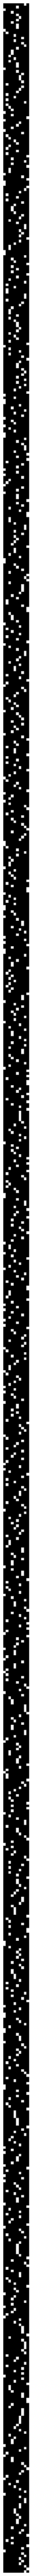

In [ ]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


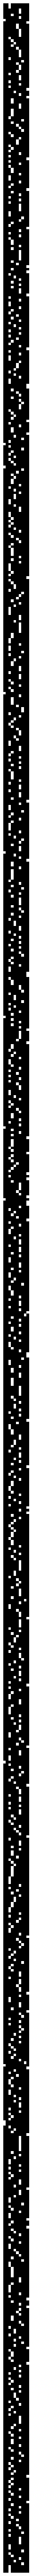

In [ ]:
plot(one_hot(torch.argmax(y2,1))) #argmax is brightest, we have answer key filled in as scantron bubble sheet

In [ ]:
y

tensor([8., 5., 0., 3., 5., 6., 5., 3., 5., 5., 0., 1., 4., 7., 4., 7., 8., 5.,
        3., 3., 2., 4., 2., 5., 5., 0., 5., 7., 6., 6., 7., 1., 7., 6., 5., 1.,
        4., 1., 8., 1., 2., 3., 0., 3., 9., 0., 6., 5., 3., 0., 7., 1., 2., 4.,
        5., 2., 1., 5., 1., 9., 3., 8., 3., 9., 2., 2., 0., 7., 9., 0., 0., 9.,
        8., 6., 1., 5., 1., 7., 4., 3., 3., 4., 7., 6., 2., 5., 8., 8., 6., 7.,
        6., 9., 6., 4., 2., 2., 0., 0., 8., 3., 4., 9., 3., 5., 3., 9., 5., 2.,
        8., 1., 4., 1., 1., 8., 8., 1., 7., 6., 3., 2., 2., 5., 2., 4., 5., 5.,
        6., 5., 2., 4., 5., 2., 9., 0., 2., 6., 2., 7., 9., 6., 5., 5., 7., 8.,
        7., 5., 8., 5., 8., 6., 4., 9., 0., 4., 0., 0., 6., 3., 8., 4., 7., 0.,
        3., 4., 0., 2., 4., 0., 0., 8., 5., 7., 8., 8., 4., 9., 5., 9., 1., 7.,
        5., 0., 5., 0., 7., 2., 1., 0., 7., 5., 0., 5., 5., 9., 5., 7., 2., 6.,
        9., 9., 2., 2., 4., 8., 8., 4., 7., 4., 5., 4., 3., 9., 4., 4., 2., 6.,
        0., 0., 4., 5., 7., 2., 9., 8., 

In [ ]:
torch.argmax(y2,1)

tensor([2, 2, 6, 6, 3, 6, 0, 9, 5, 5, 6, 6, 6, 2, 3, 4, 3, 5, 6, 6, 6, 2, 7, 5,
        6, 6, 5, 2, 6, 6, 2, 6, 2, 9, 4, 6, 9, 3, 3, 6, 6, 3, 3, 3, 2, 7, 3, 5,
        6, 7, 2, 3, 6, 5, 5, 2, 3, 2, 6, 2, 9, 2, 6, 2, 3, 3, 6, 2, 2, 6, 3, 2,
        9, 3, 6, 2, 6, 2, 6, 6, 6, 2, 2, 7, 6, 3, 2, 9, 6, 2, 6, 2, 3, 3, 6, 3,
        6, 6, 6, 6, 3, 5, 9, 3, 9, 2, 4, 6, 3, 6, 3, 6, 6, 9, 2, 6, 2, 2, 6, 3,
        2, 5, 3, 6, 2, 4, 6, 2, 6, 2, 5, 3, 2, 6, 9, 2, 6, 2, 2, 6, 5, 5, 4, 2,
        4, 6, 2, 2, 9, 9, 3, 5, 6, 3, 6, 7, 6, 6, 2, 3, 4, 3, 9, 2, 6, 3, 3, 9,
        4, 7, 2, 0, 2, 7, 3, 2, 4, 2, 3, 4, 0, 7, 5, 3, 4, 3, 3, 6, 2, 4, 6, 4,
        4, 2, 2, 4, 6, 6, 2, 2, 3, 2, 3, 2, 4, 6, 2, 3, 5, 6, 3, 2, 3, 3, 3, 6,
        3, 6, 2, 2, 2, 3, 2, 9, 2, 3, 4, 4, 2, 7, 6, 5, 3, 6, 4, 2, 2, 2, 6, 6,
        4, 6, 6, 6, 6, 3, 3, 2, 2, 6, 2, 2, 7, 2, 6, 4, 3, 3, 6, 6, 2, 6, 6, 2,
        3, 6, 2, 3, 0, 6, 3, 3, 3, 5, 7, 7, 2, 6, 4, 3, 2, 3, 5, 6, 6, 4, 5, 2,
        2, 6, 6, 3, 2, 6, 2, 6, 3, 6, 2,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b #now we want to figure out if they are equal, b is our backsize of how many images being quizzed on at one time = 1000

tensor(0.1040, device='cuda:0')

In [ ]:
X.shape 

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([2, 6, 6,  ..., 6, 6, 2], device='cuda:0')

In [ ]:
Y

tensor([9., 0., 0.,  ..., 3., 0., 5.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0777, device='cuda:0')

In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

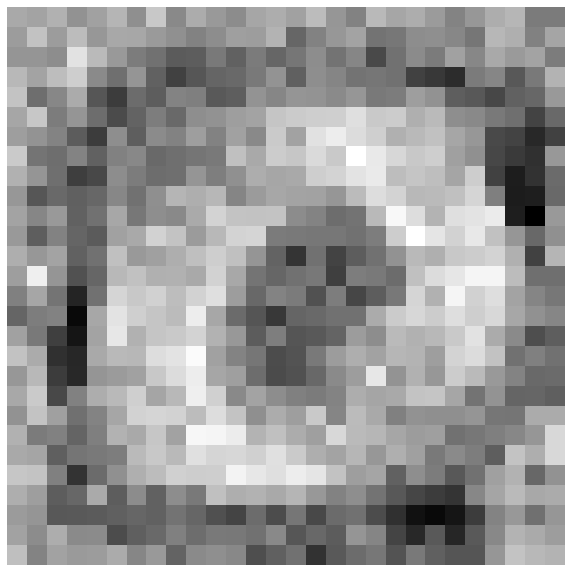

In [ ]:
plot(W[:,0].reshape(28,28))

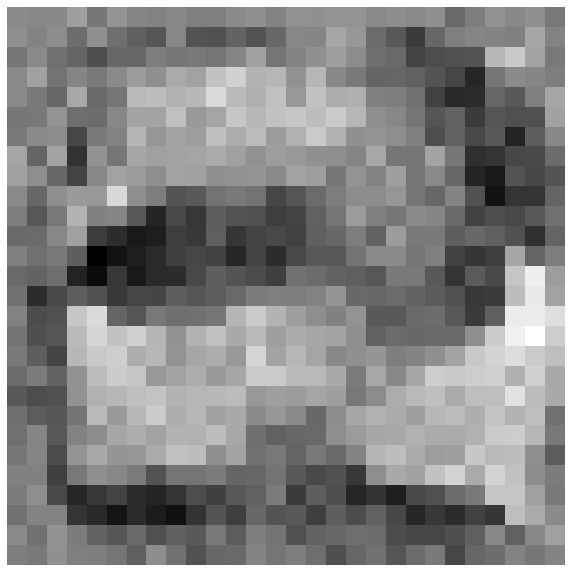

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

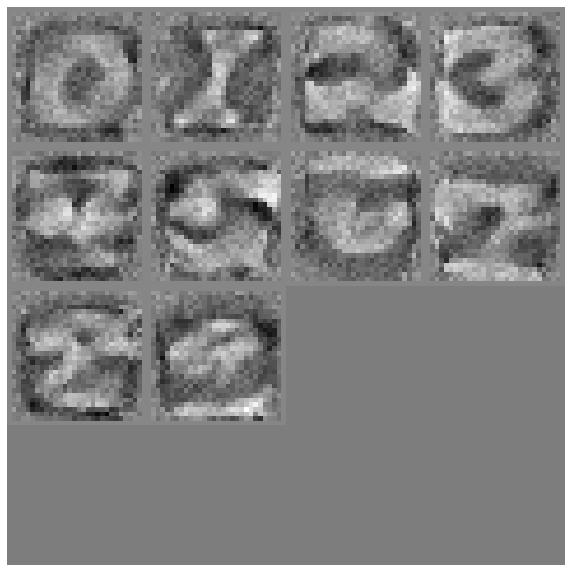

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x): #scale our output, scaled between zero and one think of it as probability 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):           #measuring ways in which labels are different from where they should be  
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
#truncated normal distrubtion, nothing bigger than 2 or -2 

In [ ]:
%%html 
<img src ='https://i.stack.imgur.com/fXqXs.png'> 

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): 
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode): #going to pull some of these images for us, like dealer at casino, give me more cards! 
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


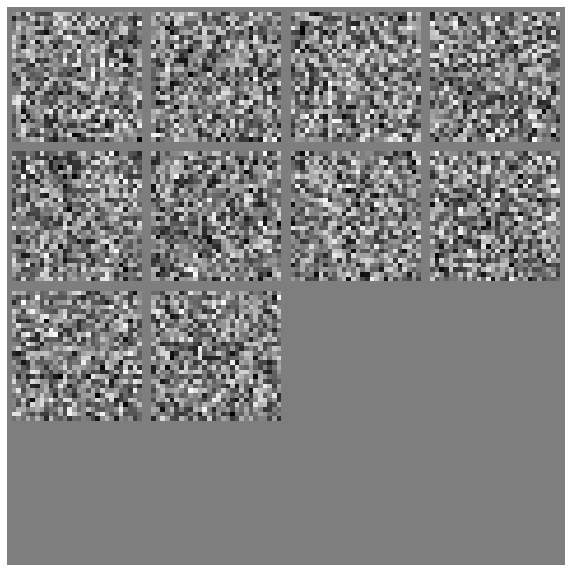

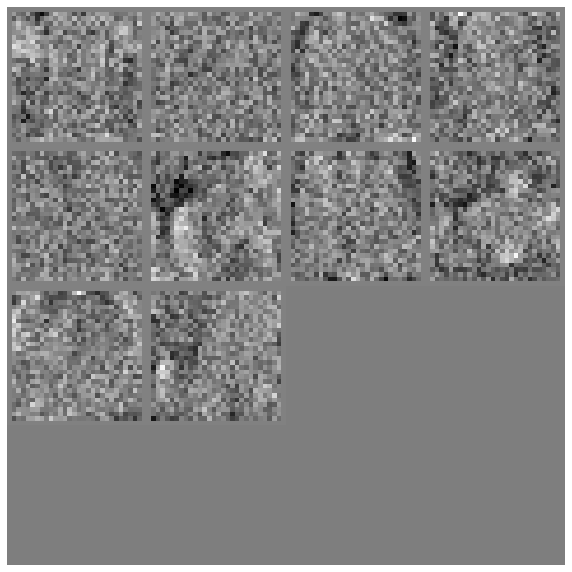

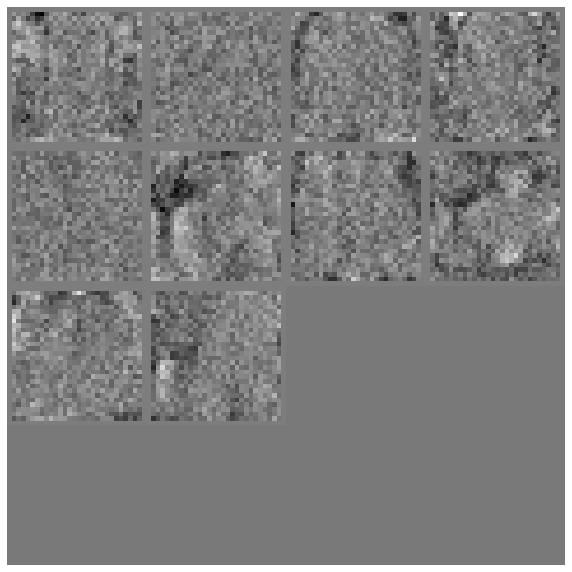

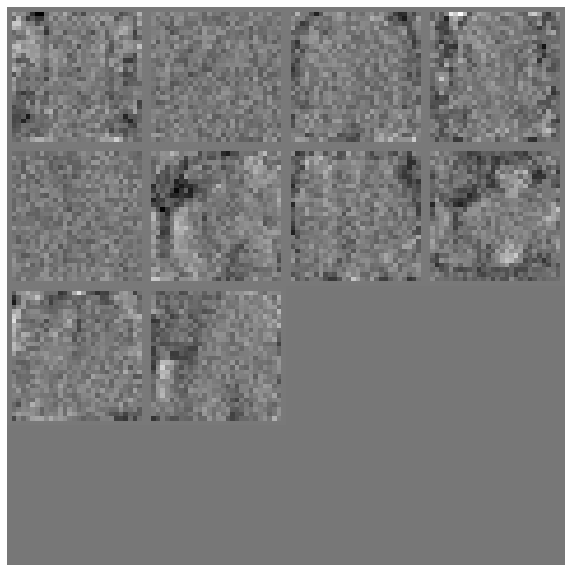

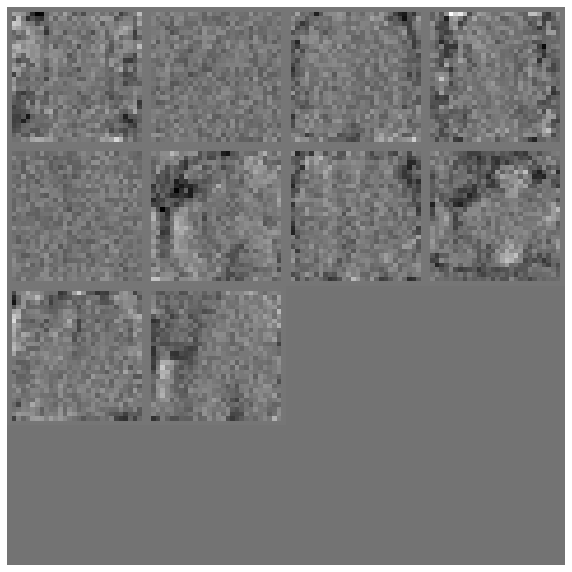

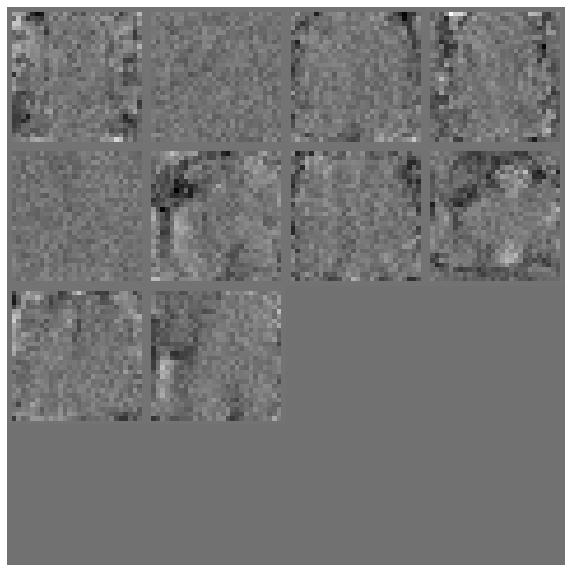

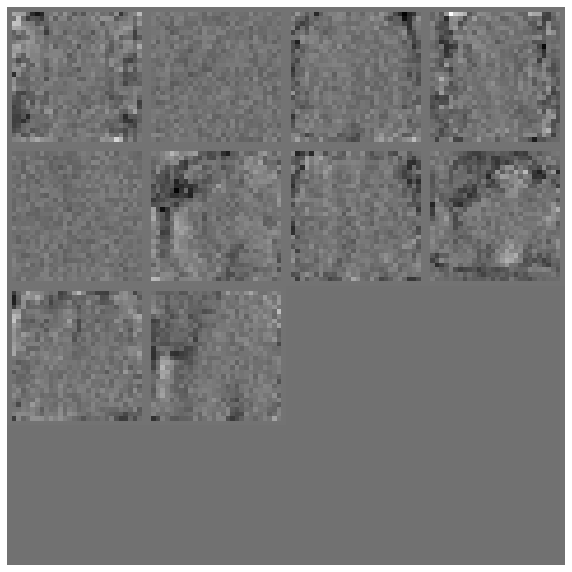

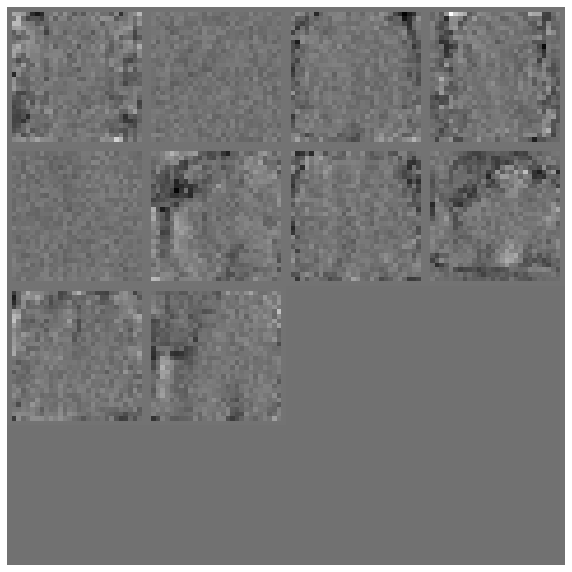

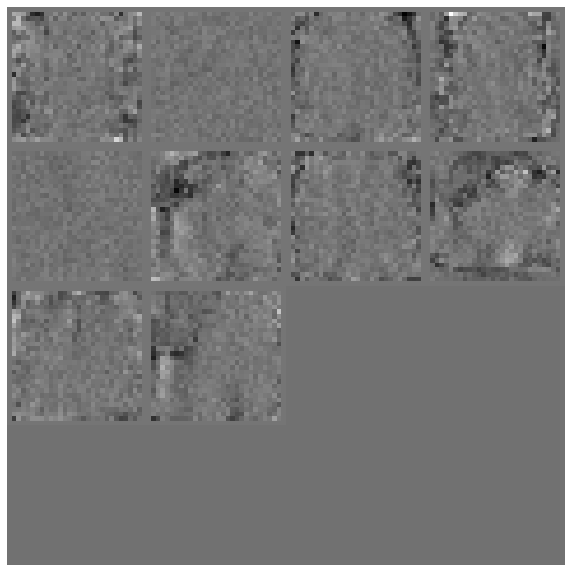

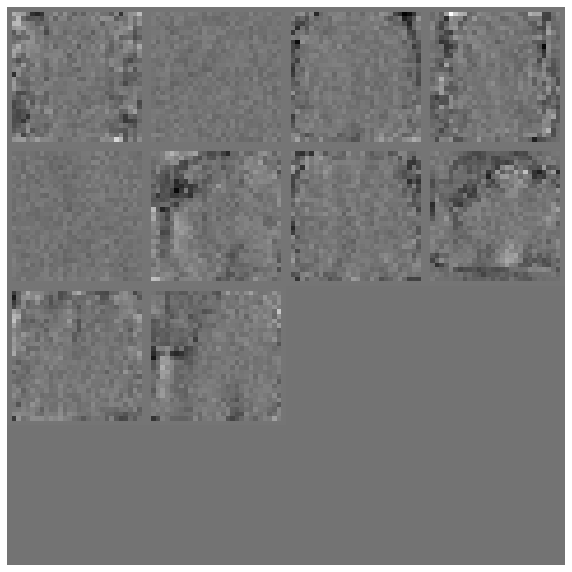

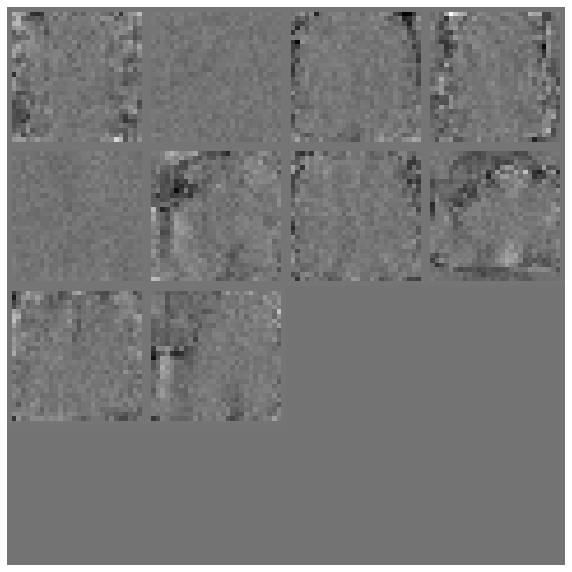

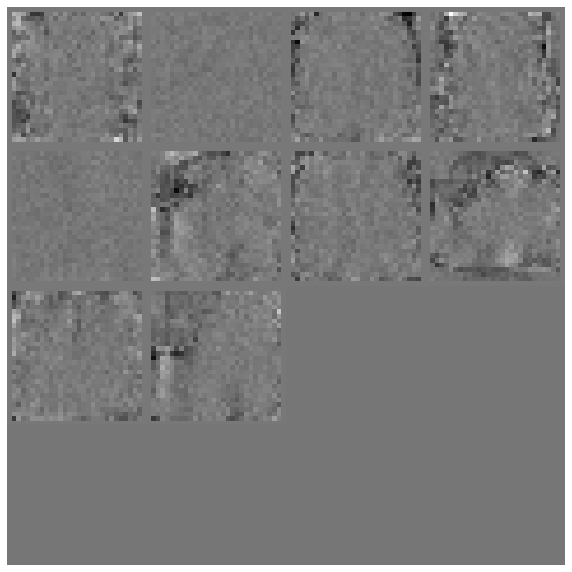

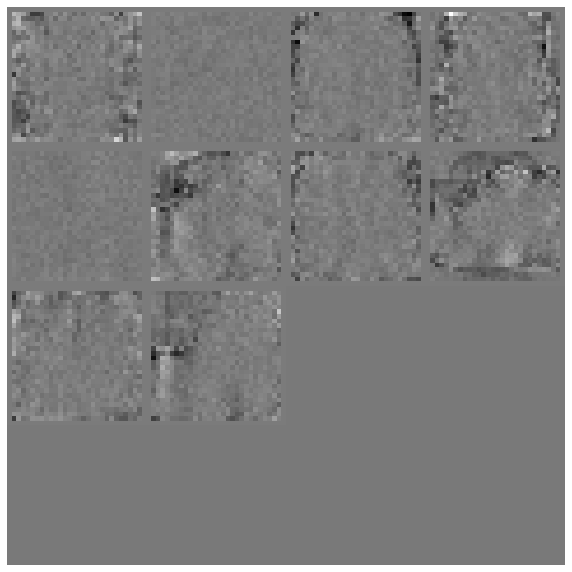

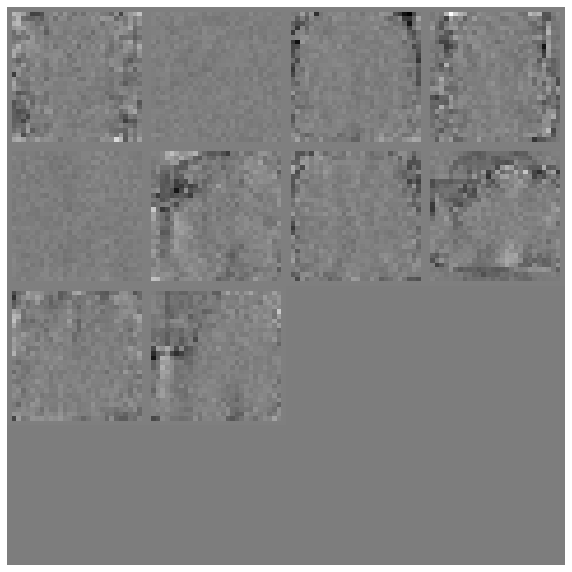

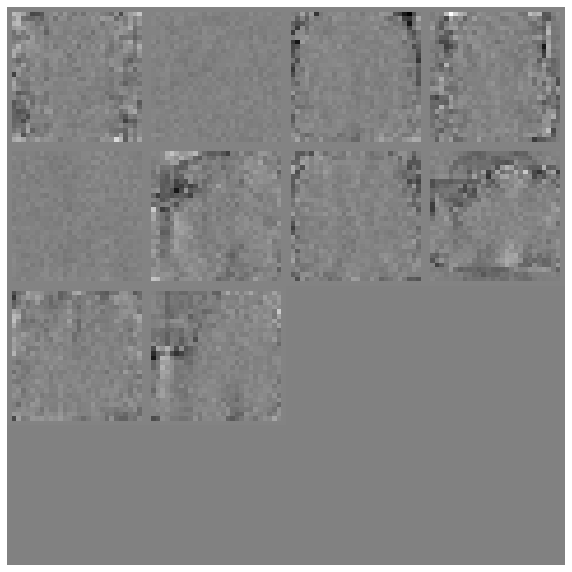

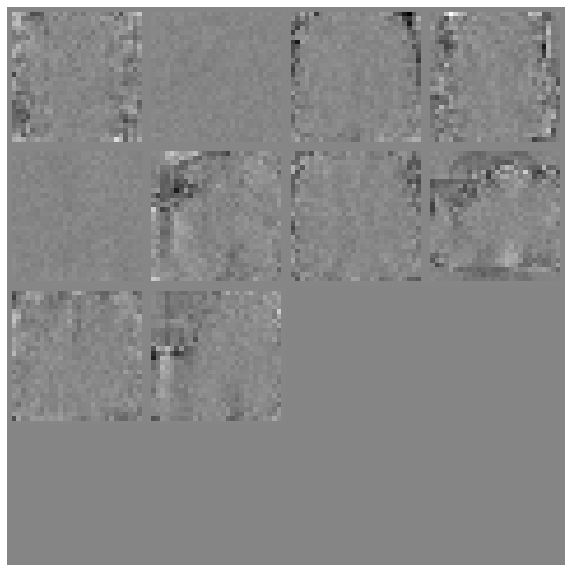

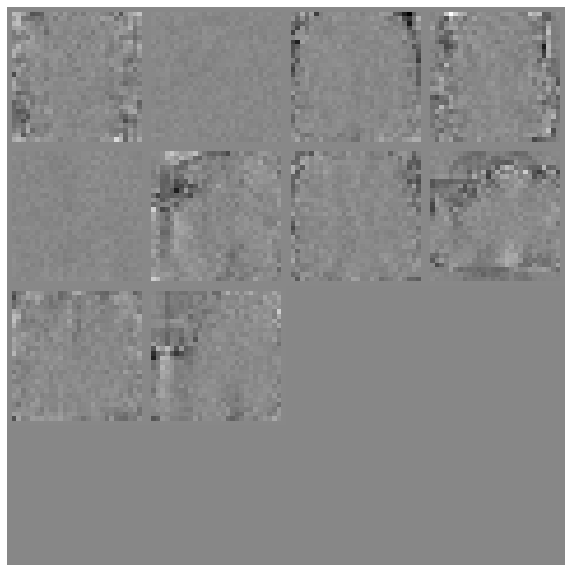

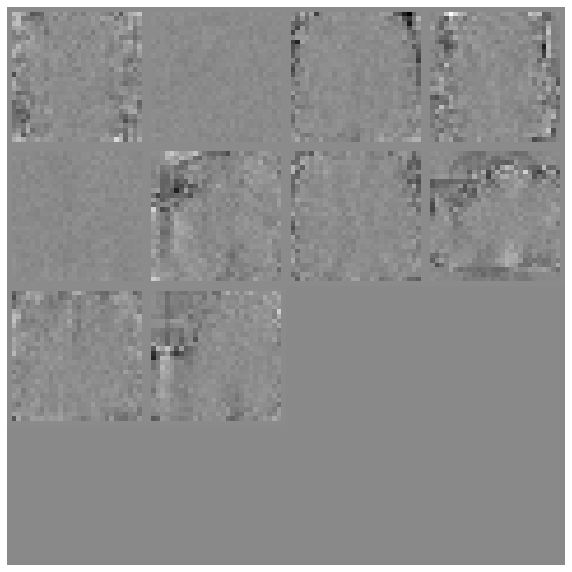

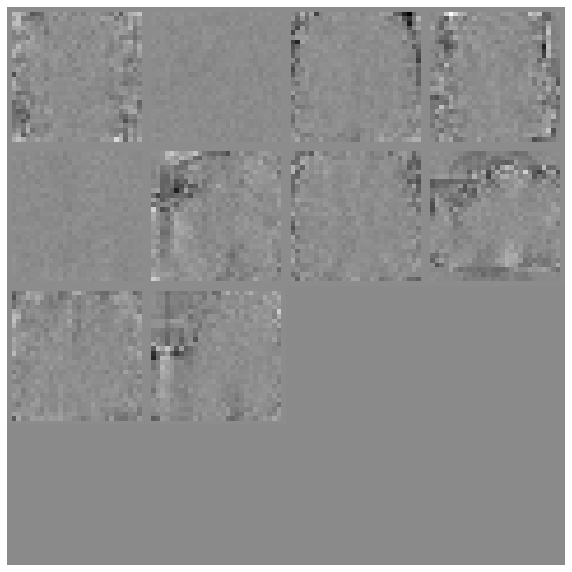

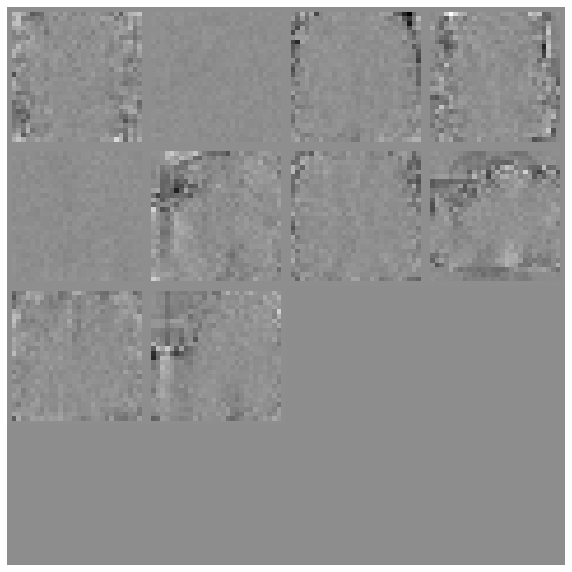

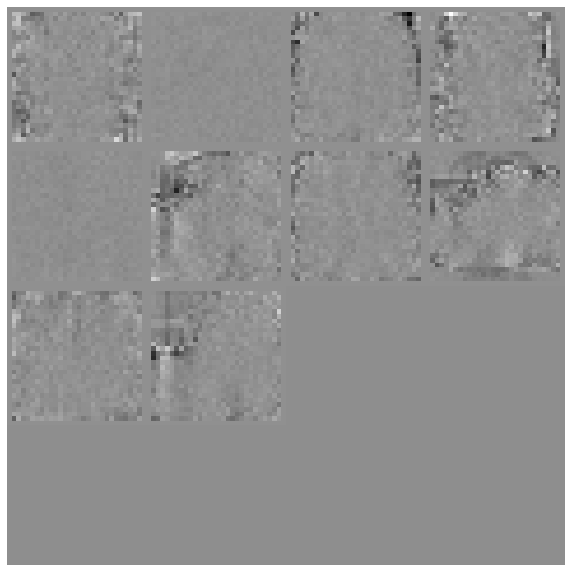

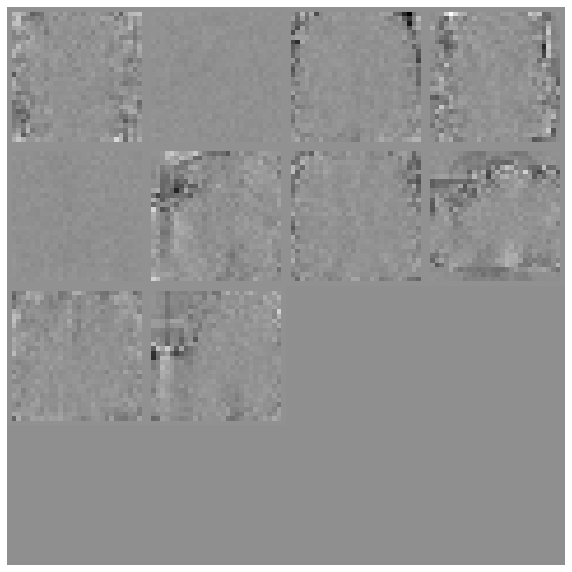

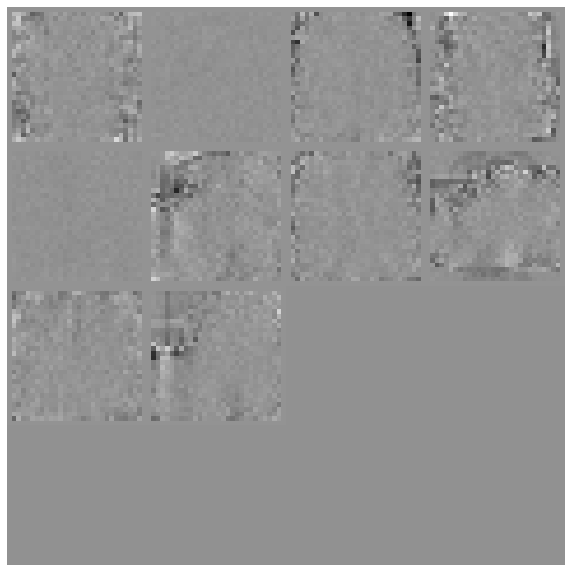

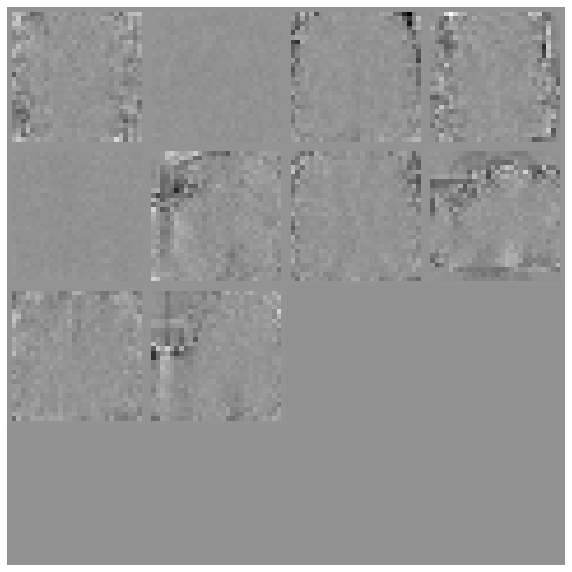

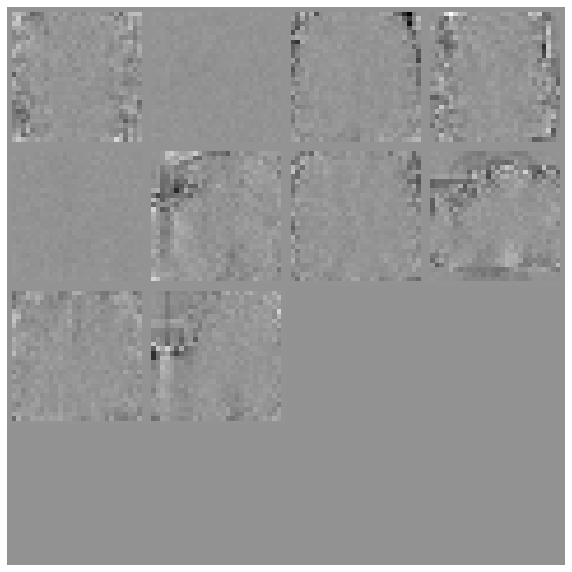

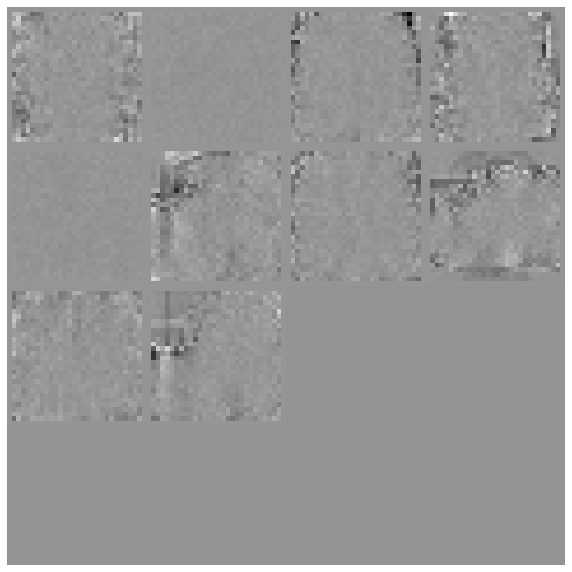

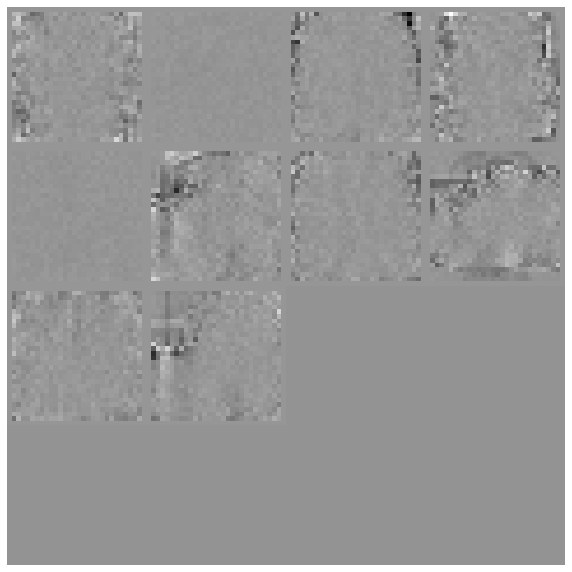

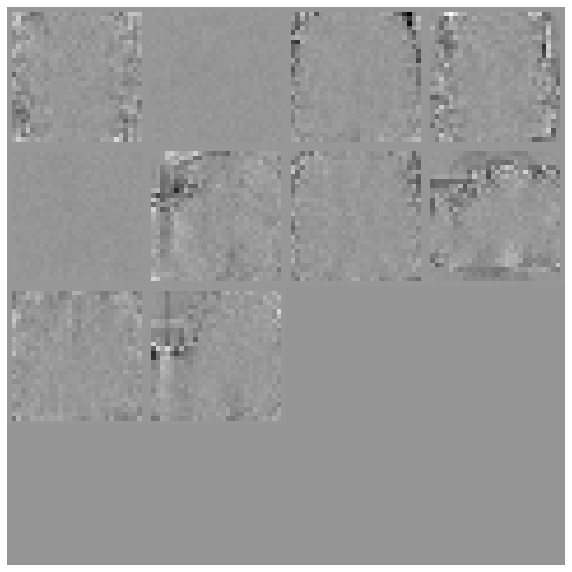

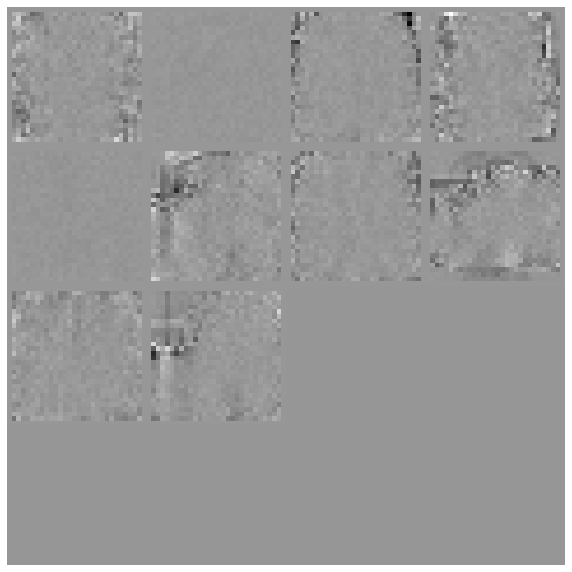

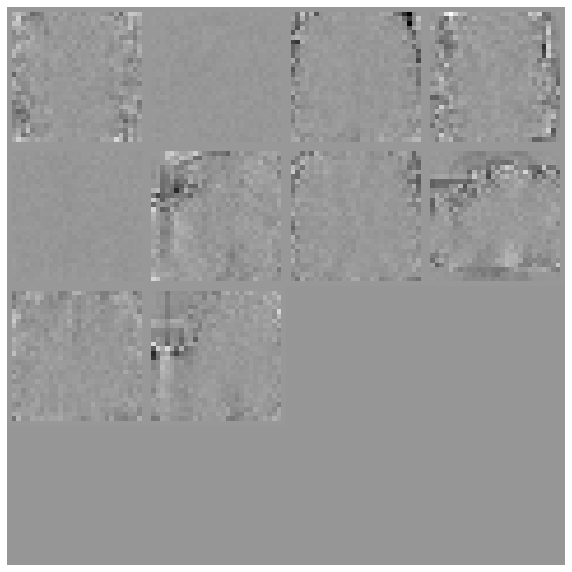

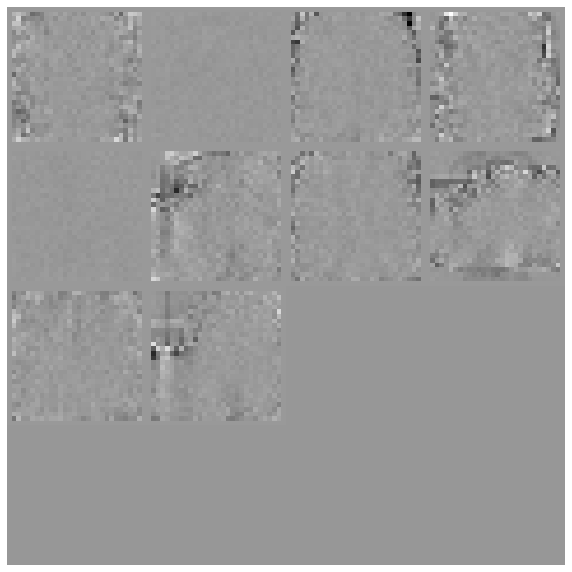

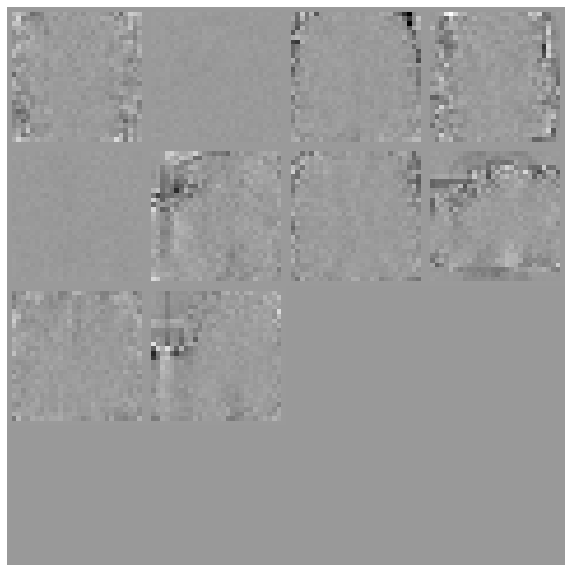

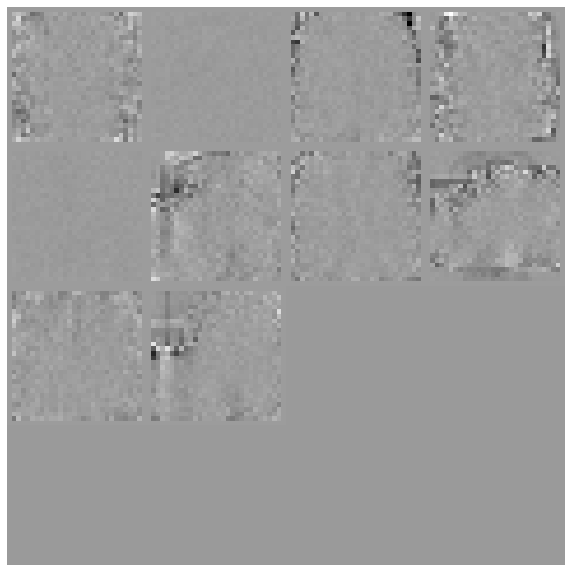

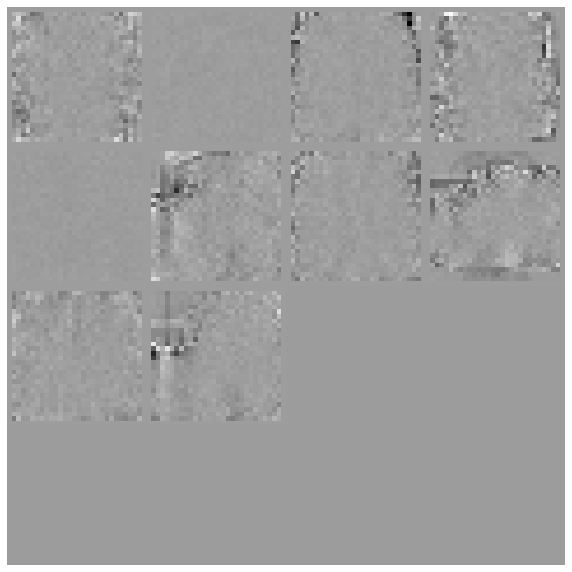

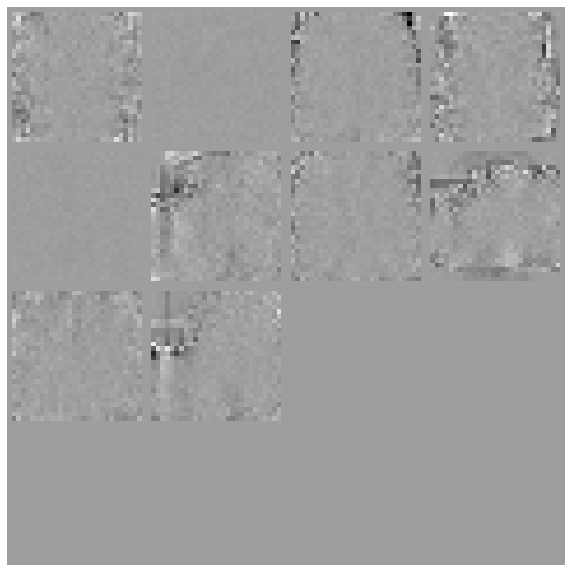

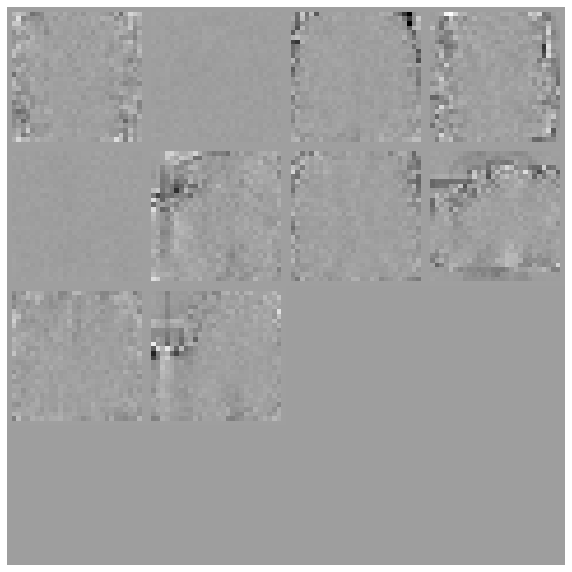

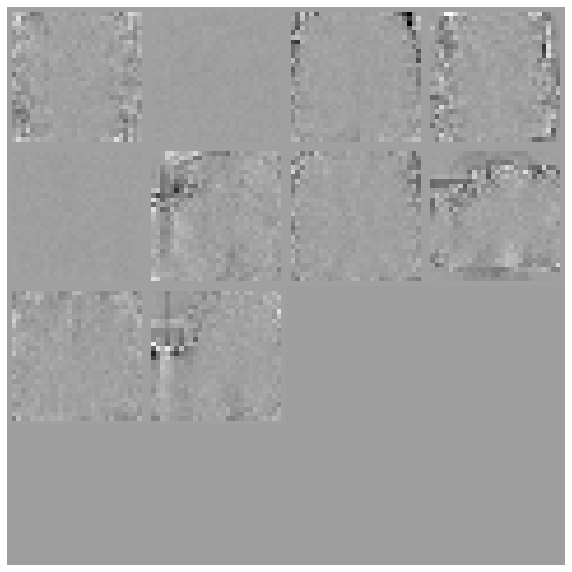

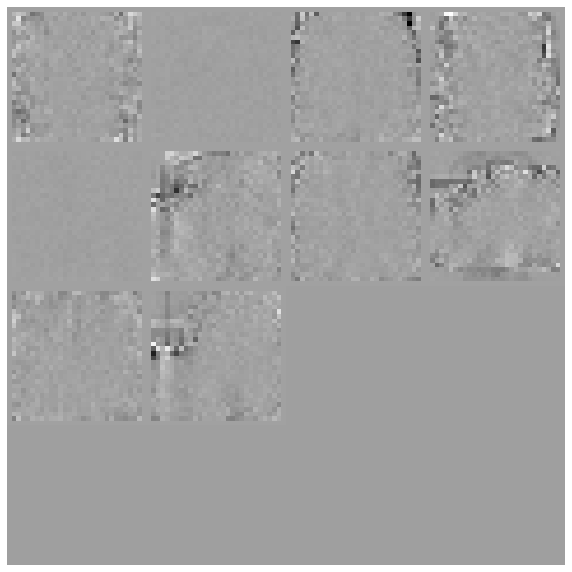

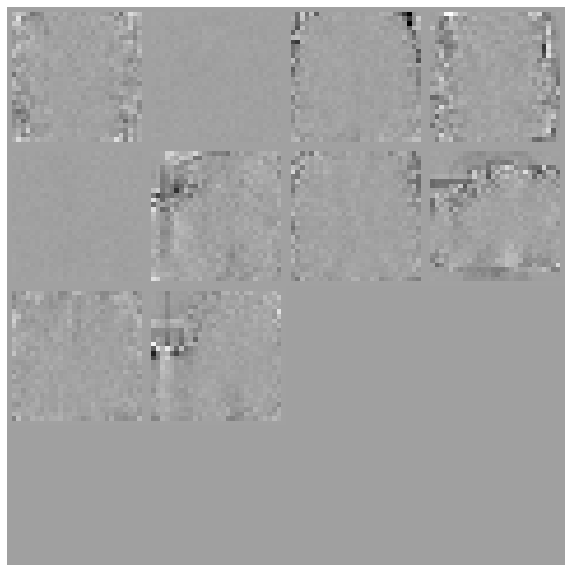

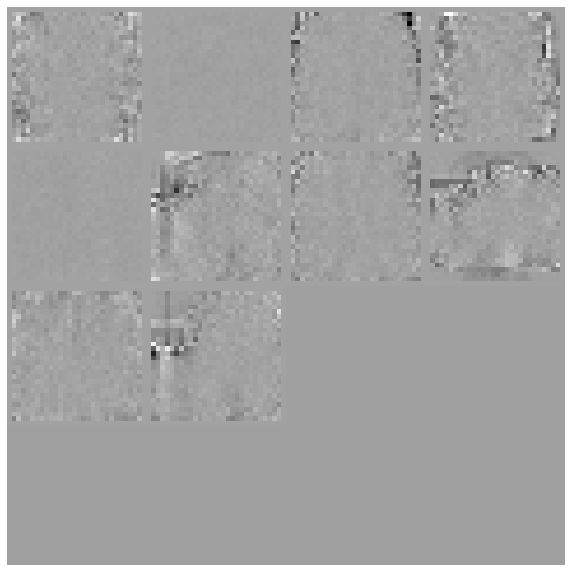

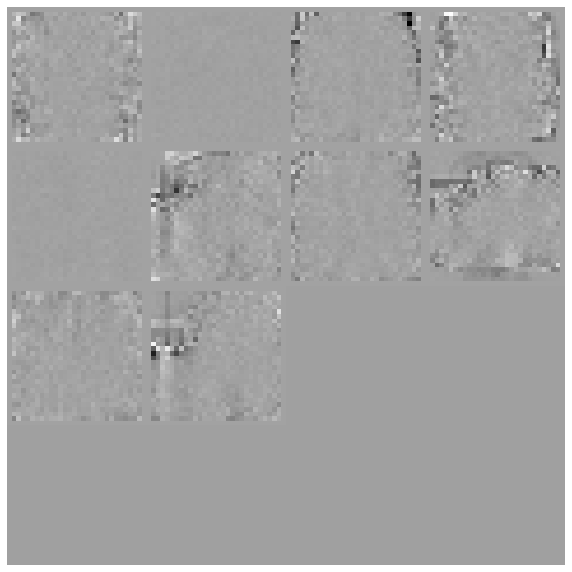

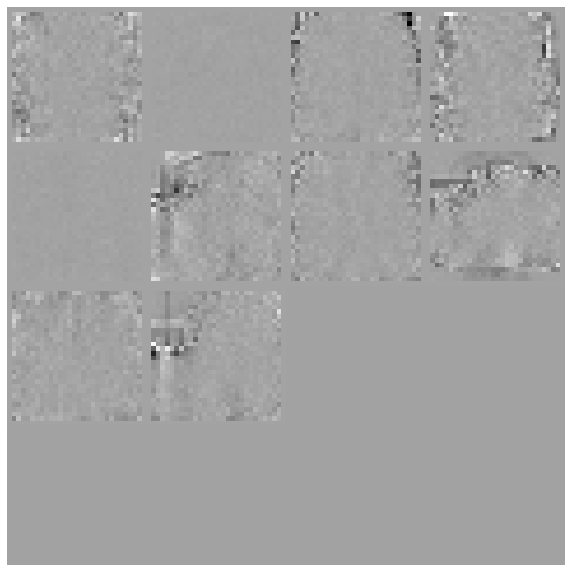

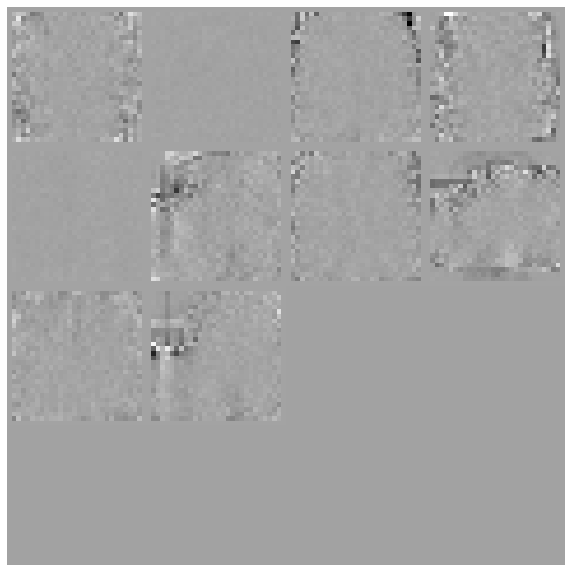

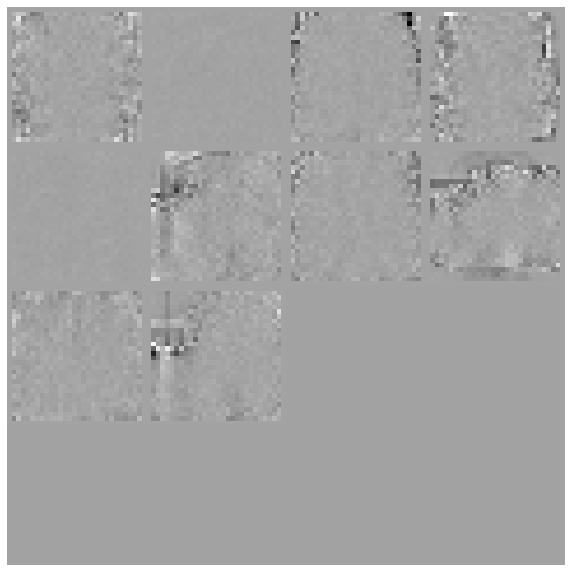

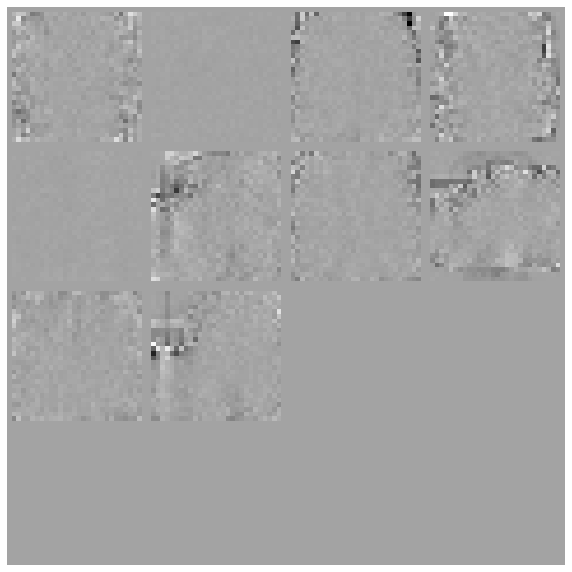

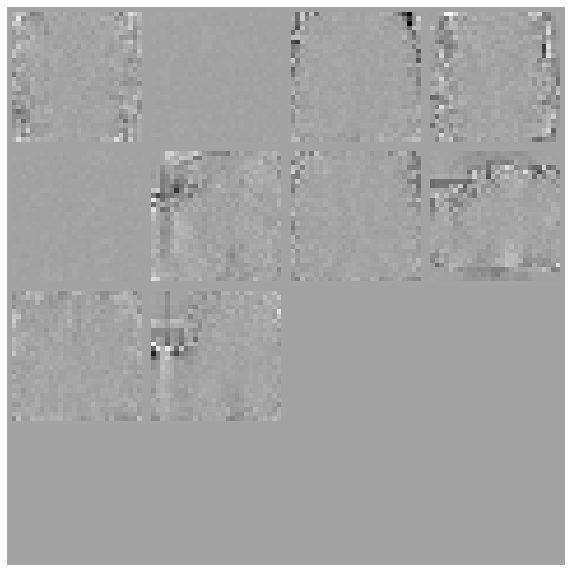

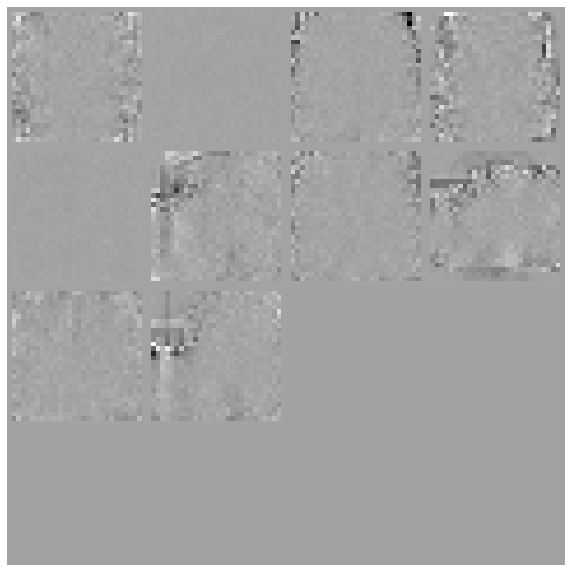

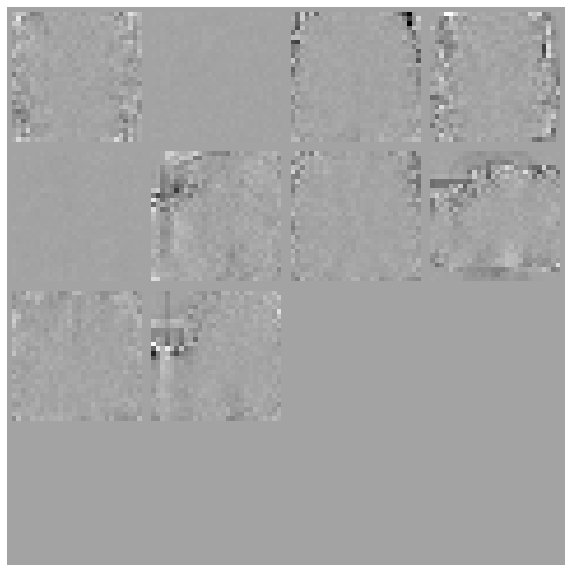

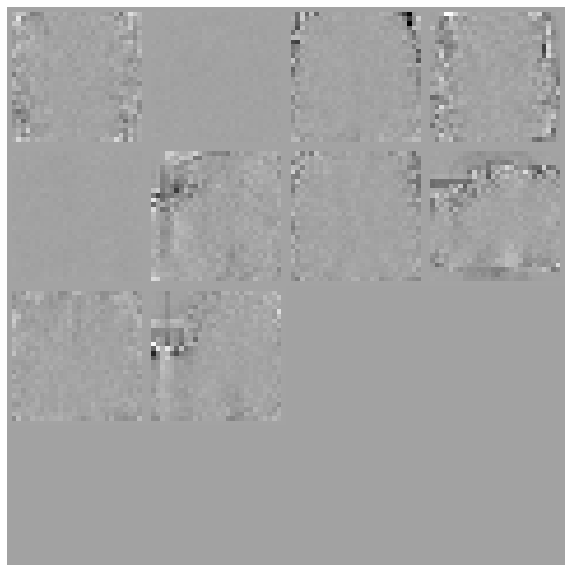

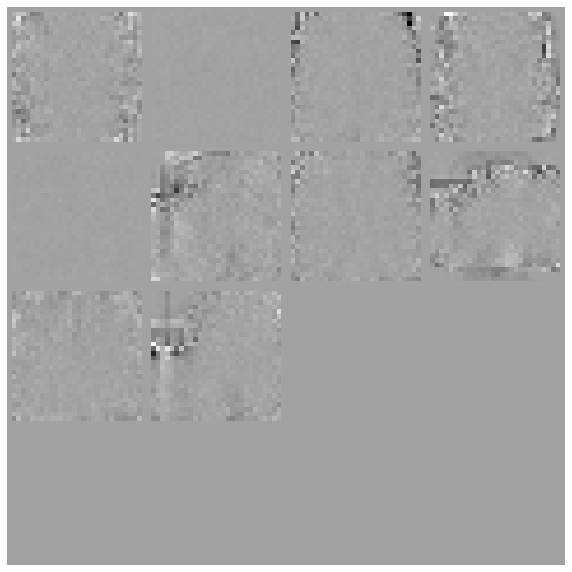

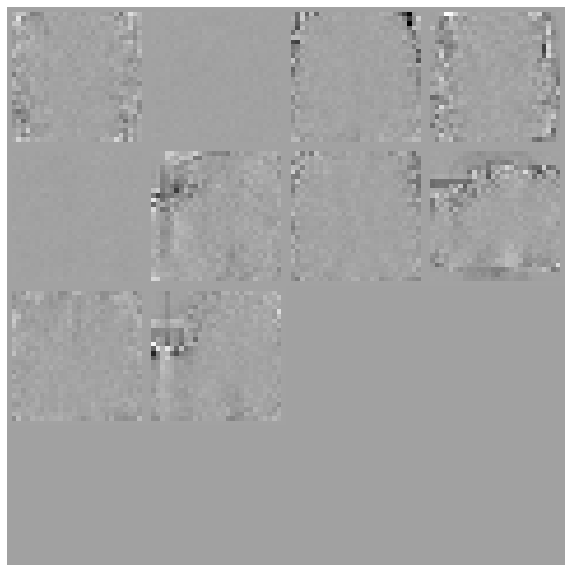

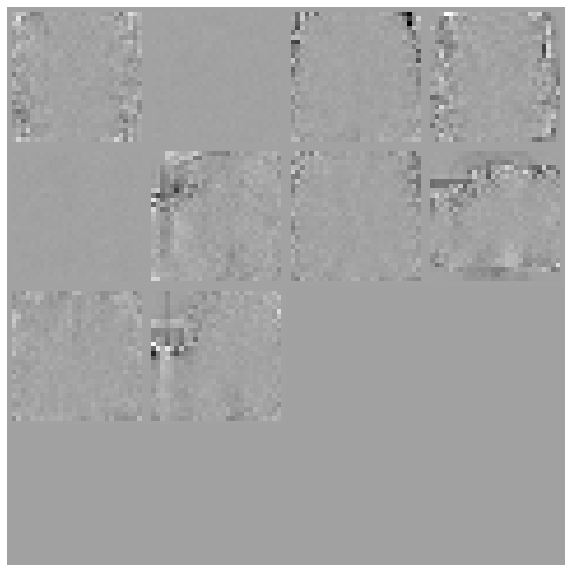

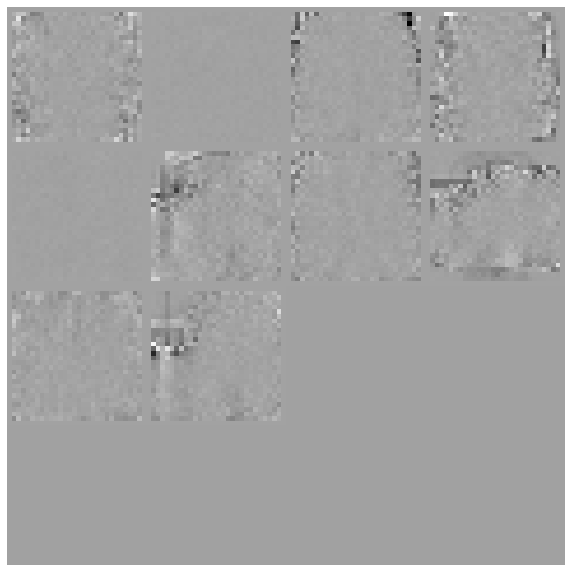

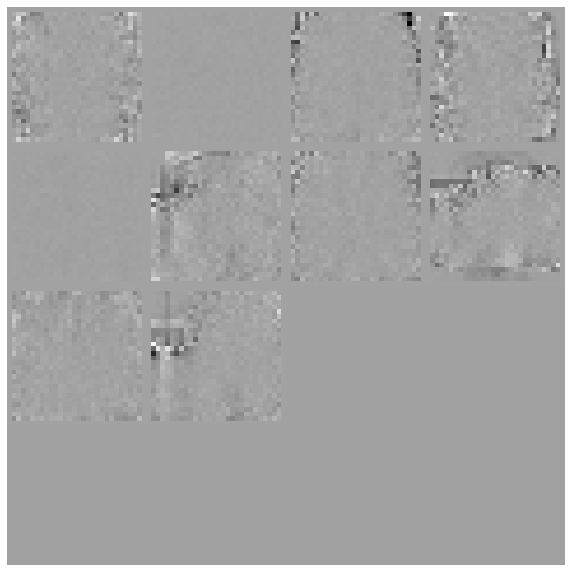

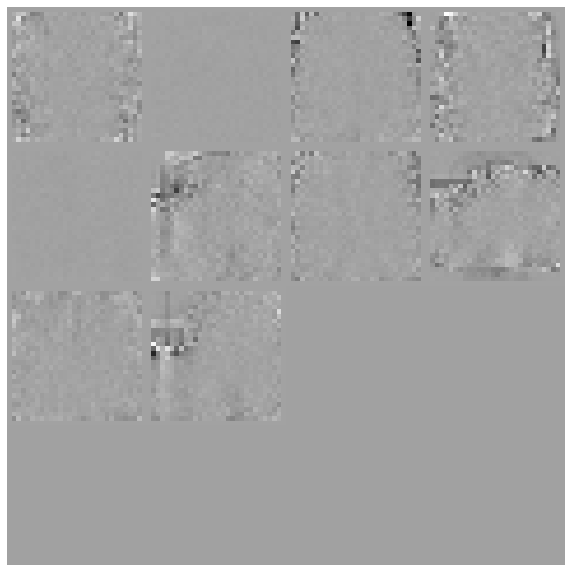

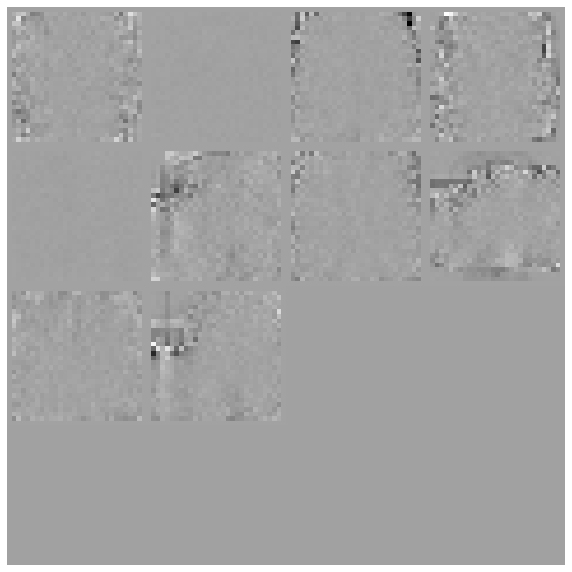

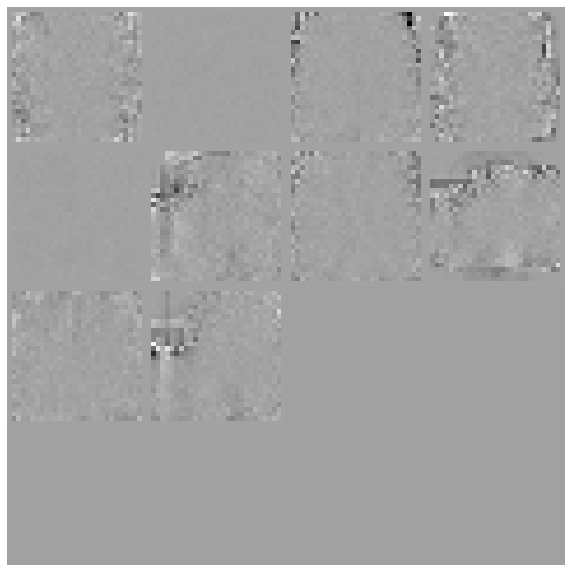

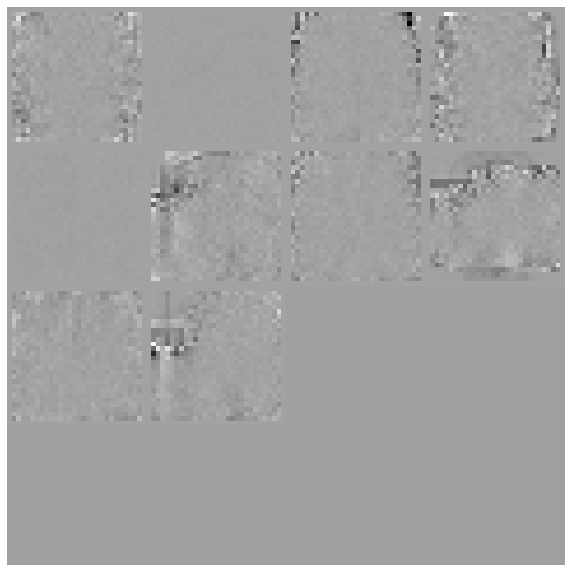

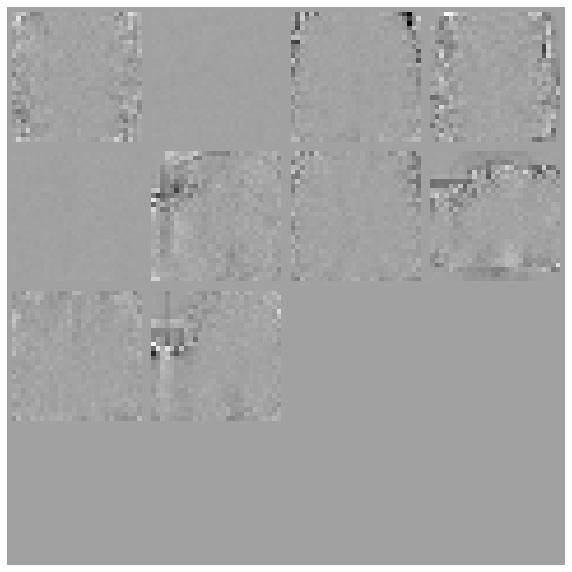

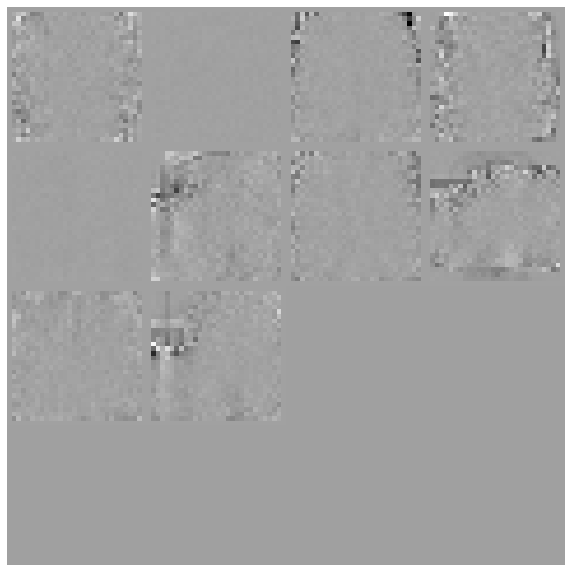

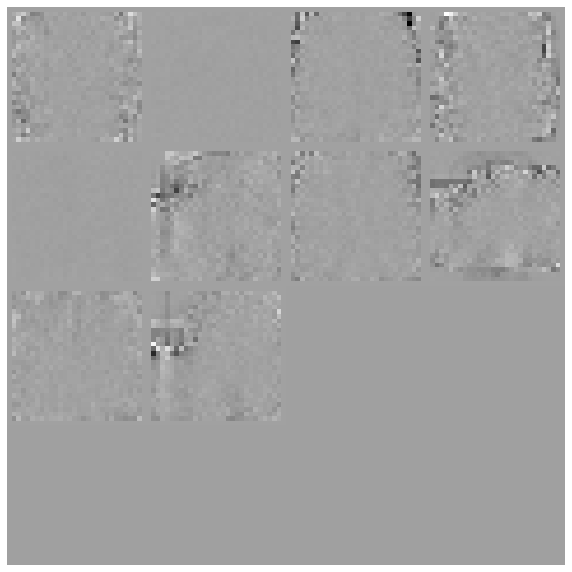

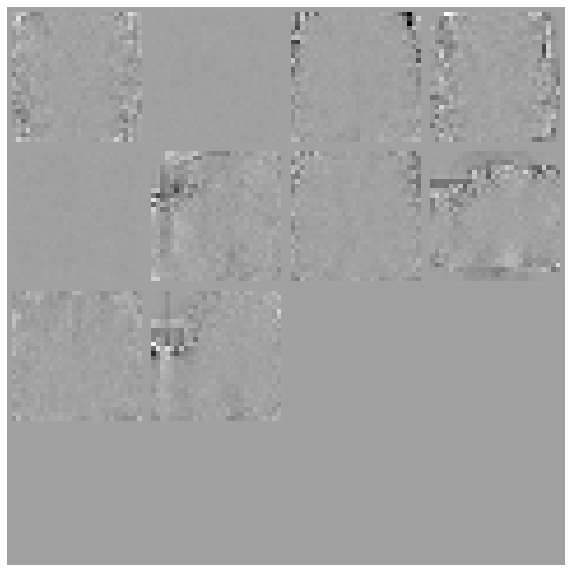

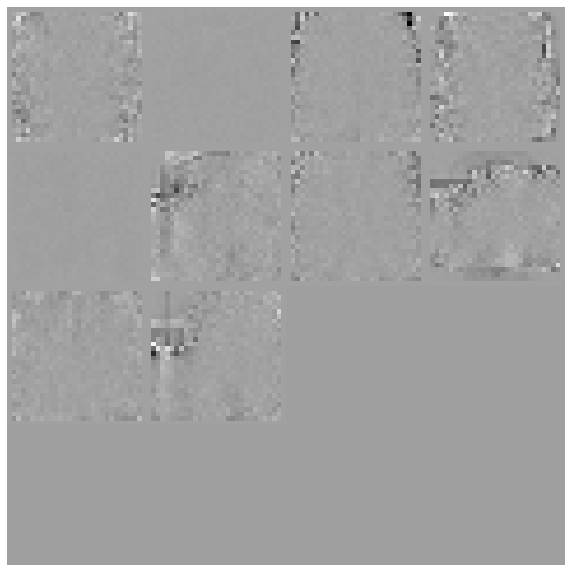

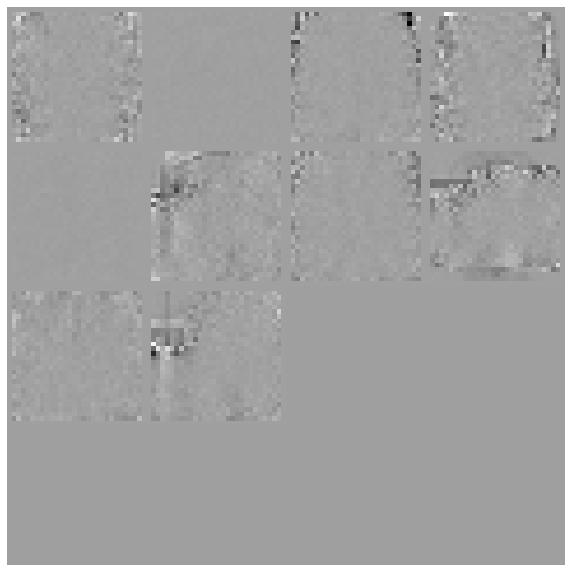

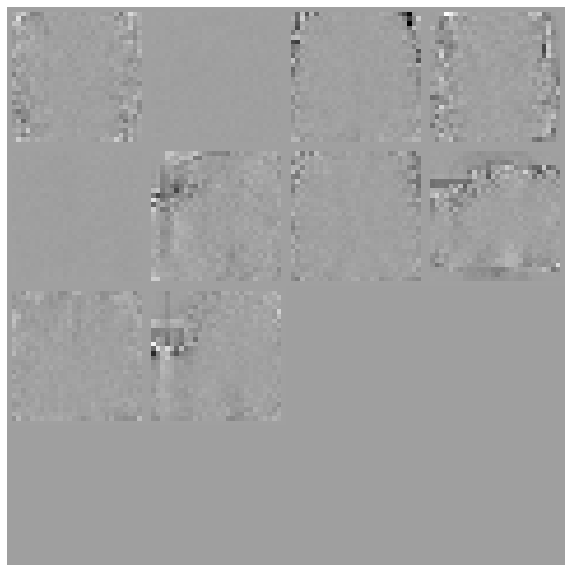

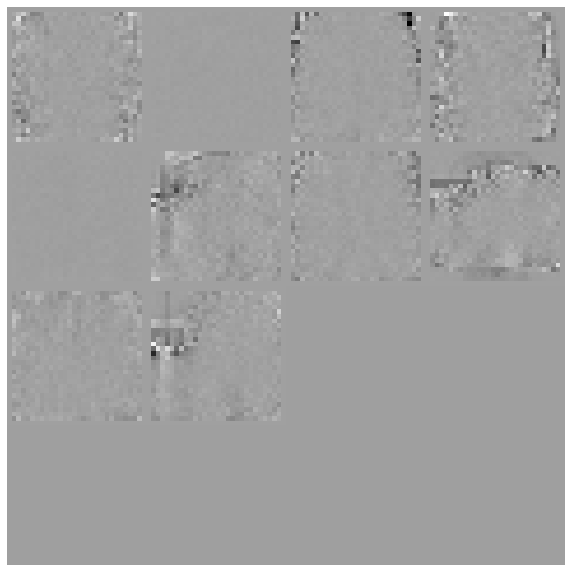

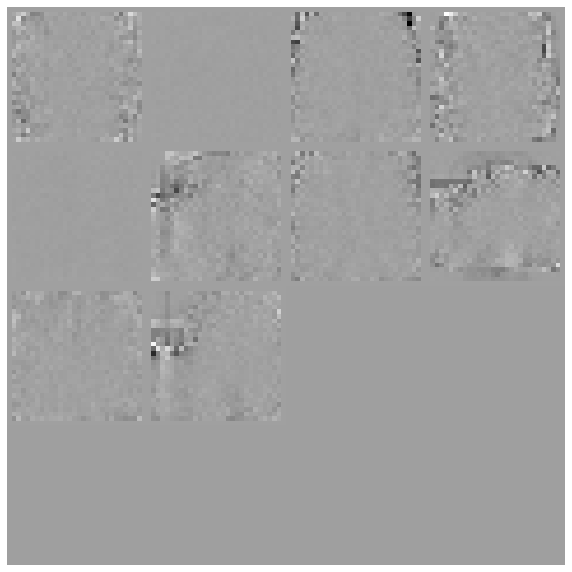

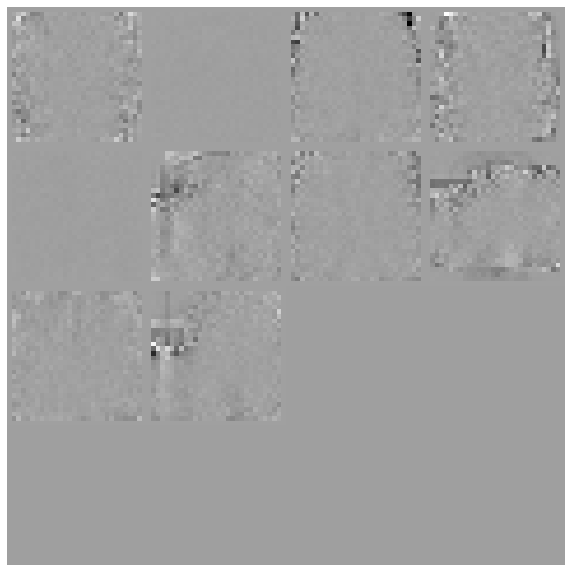

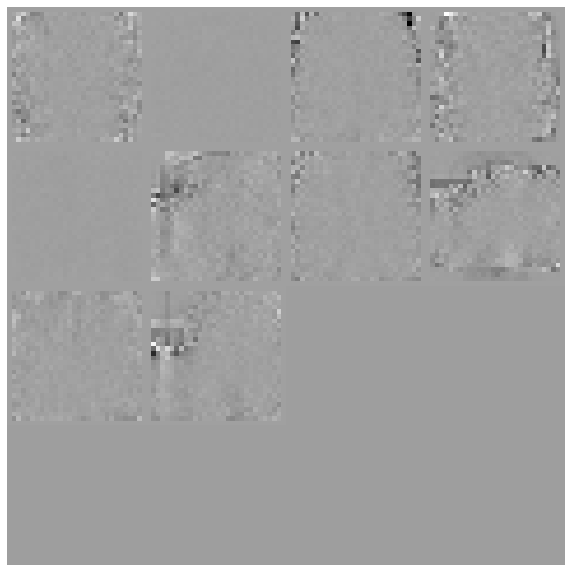

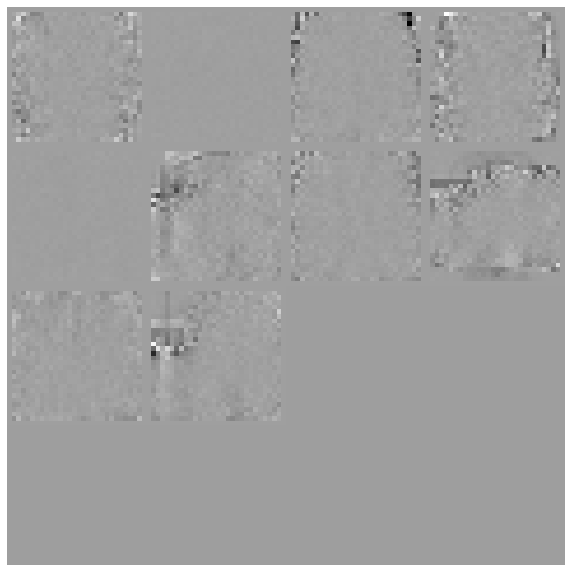

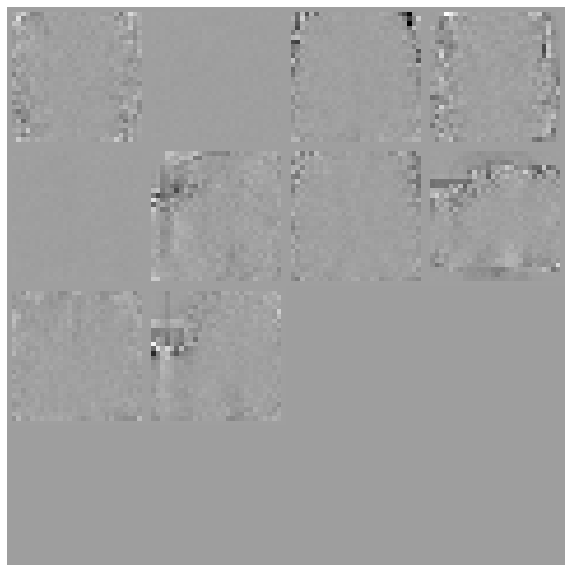

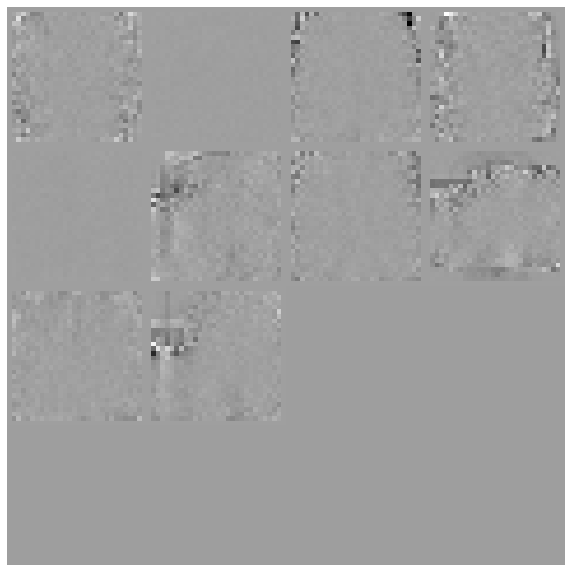

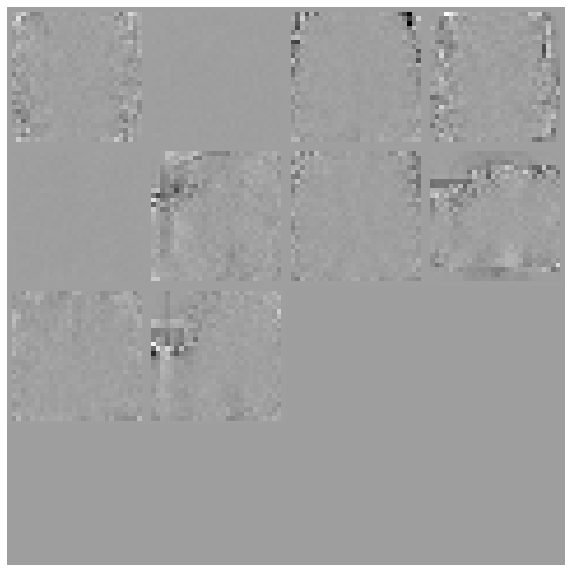

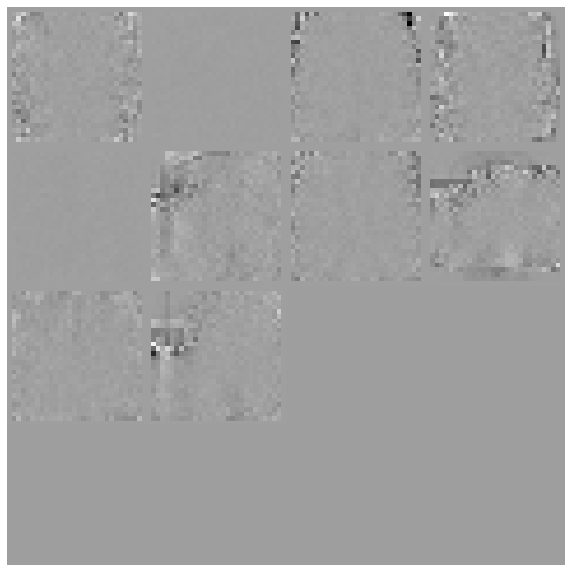

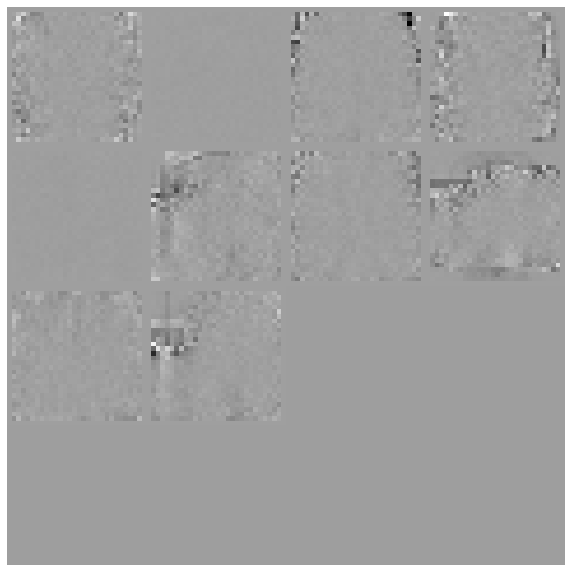

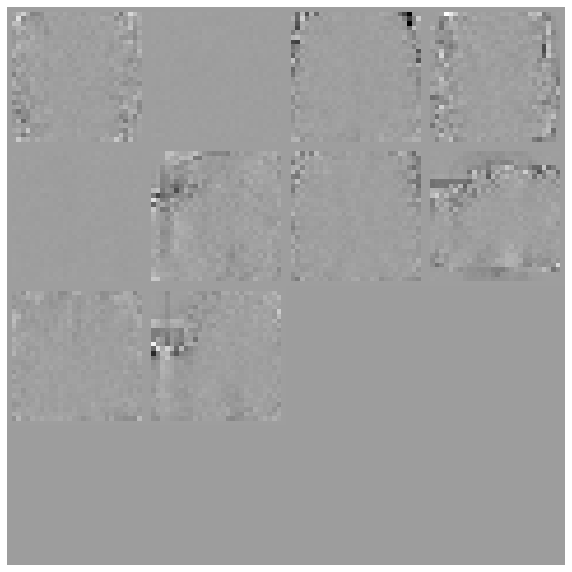

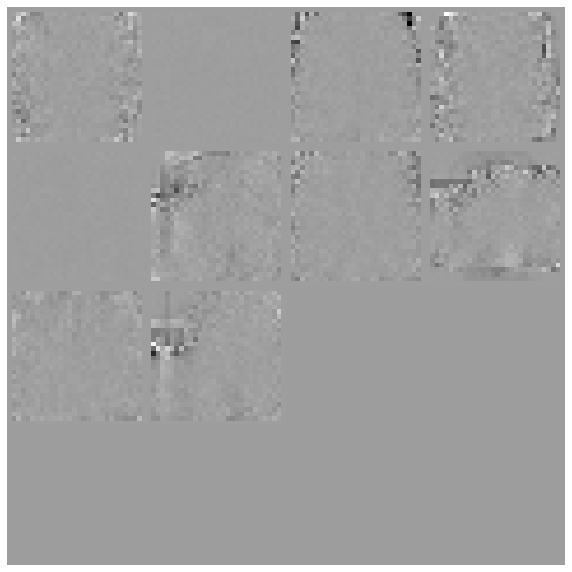

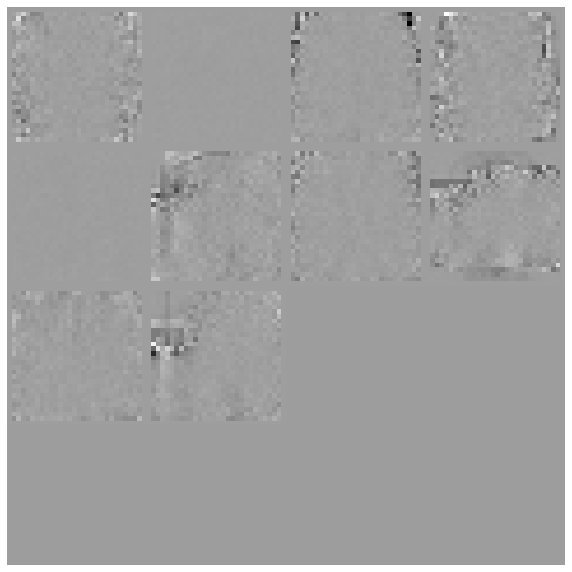

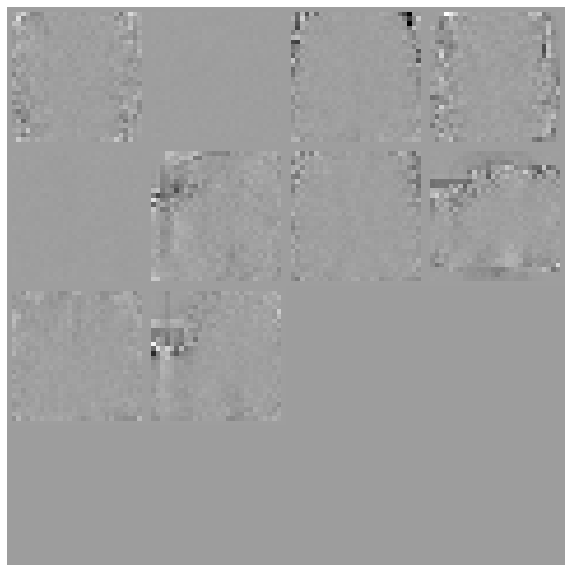

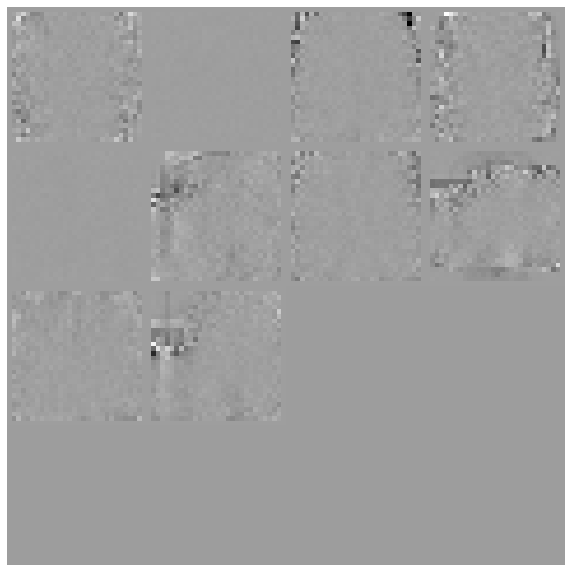

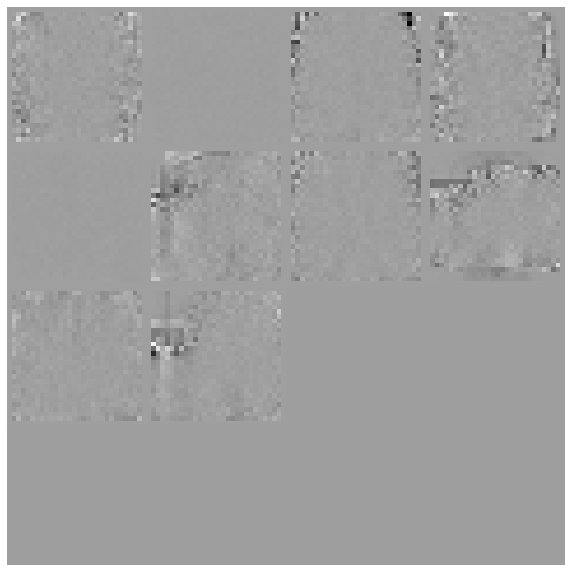

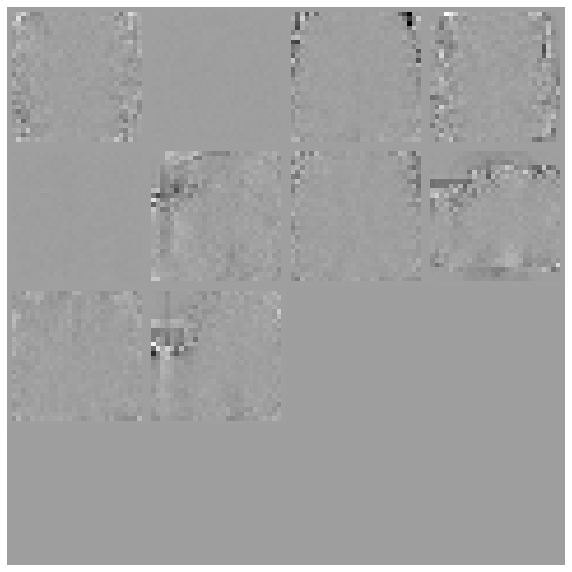

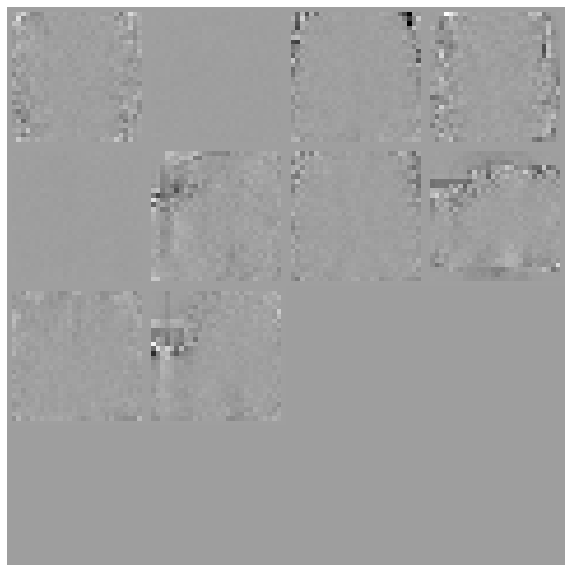

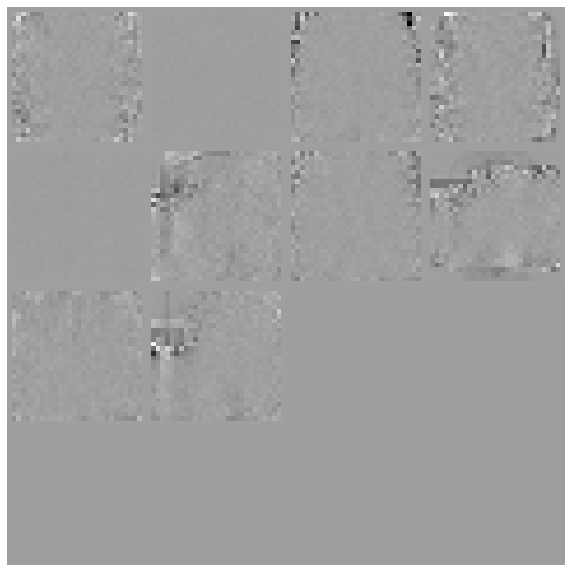

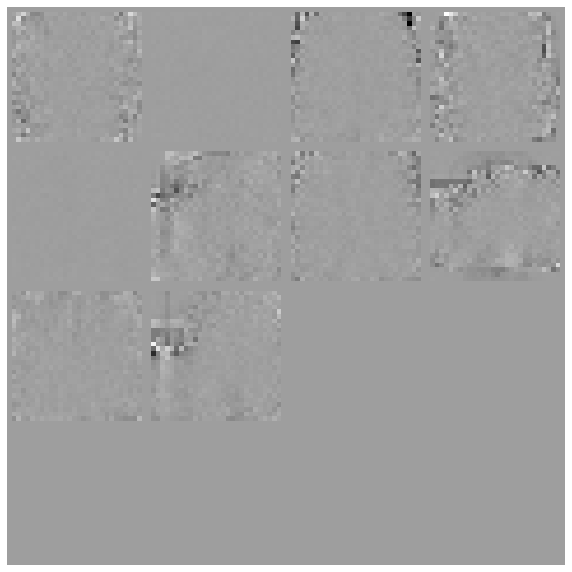

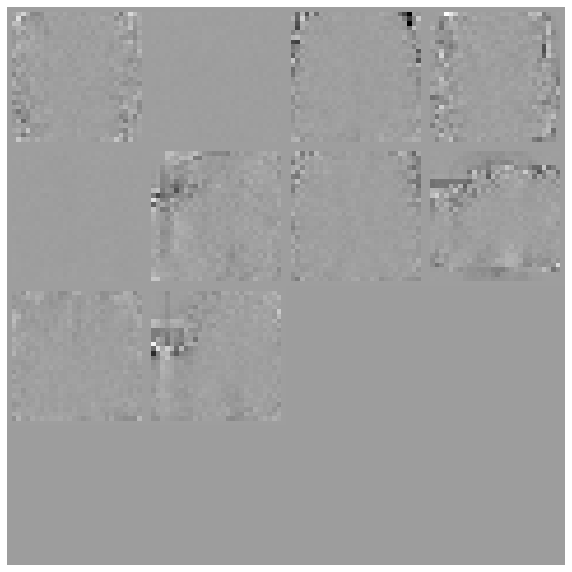

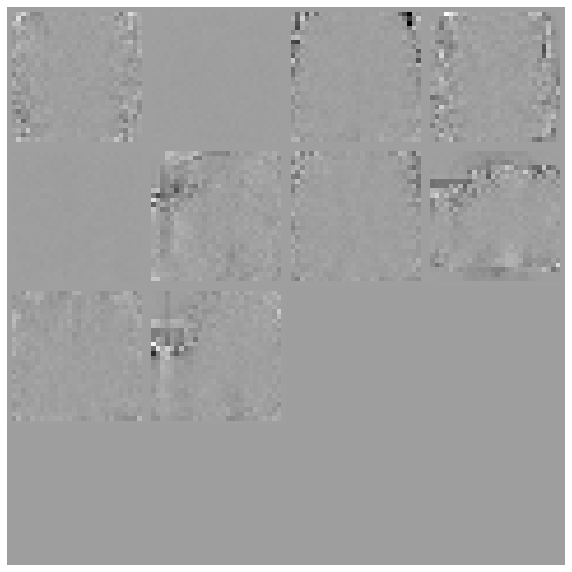

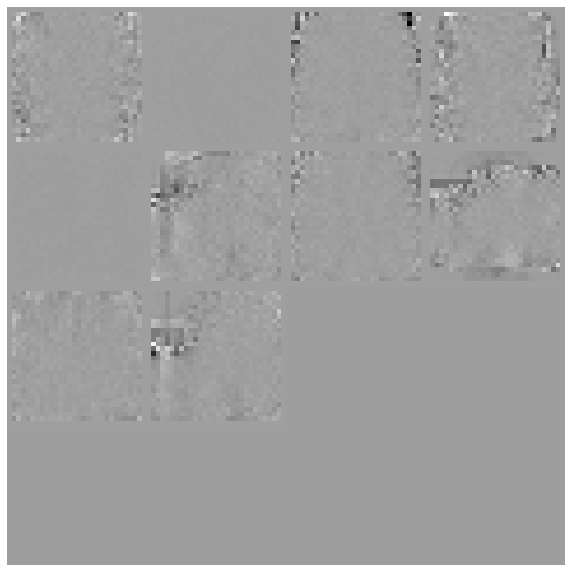

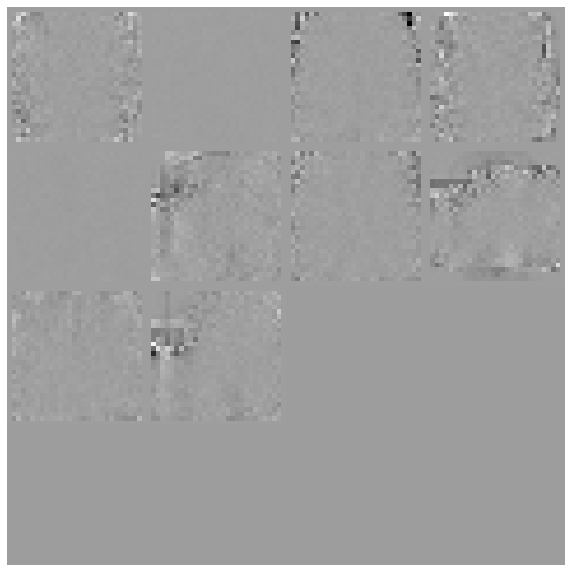

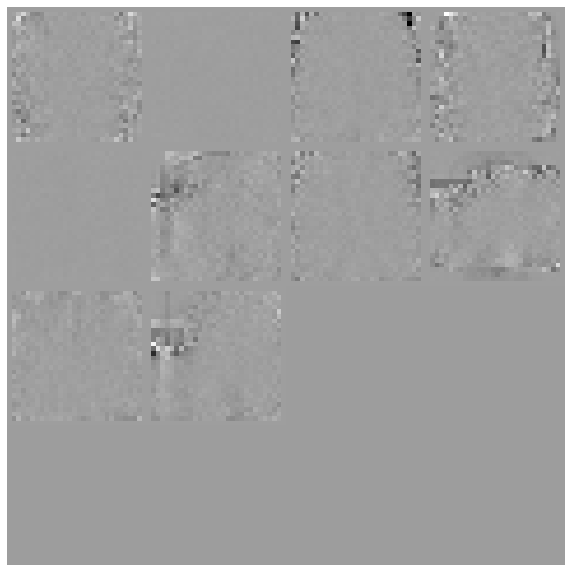

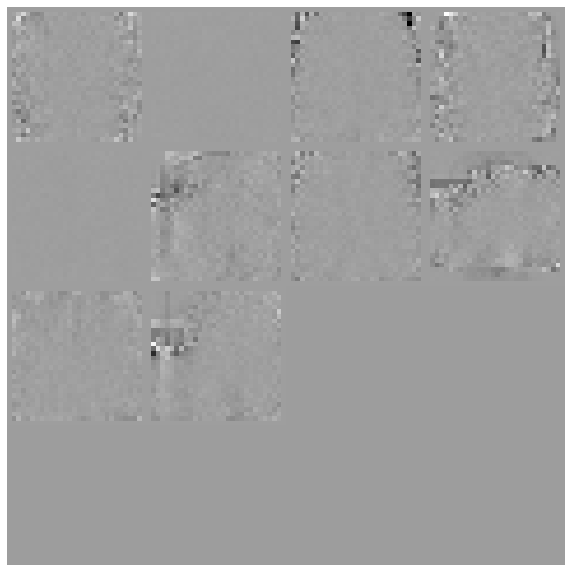

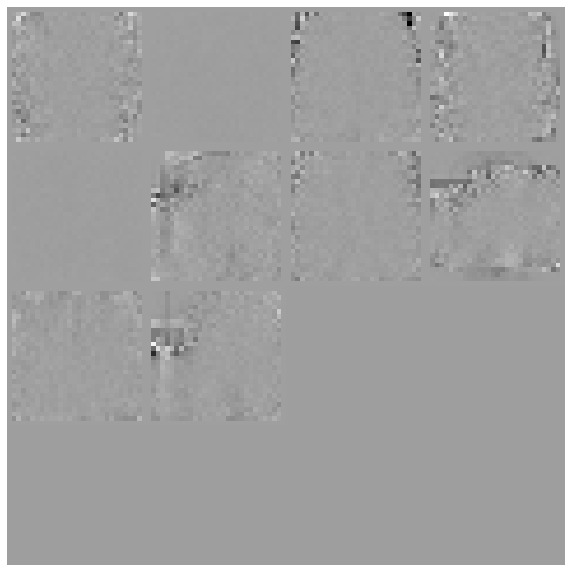

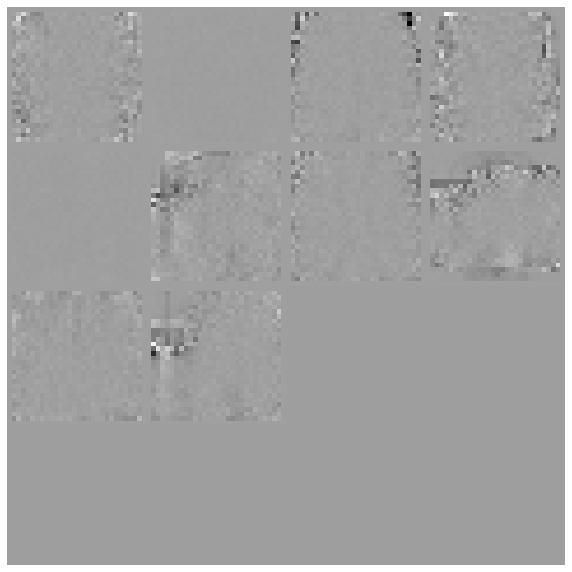

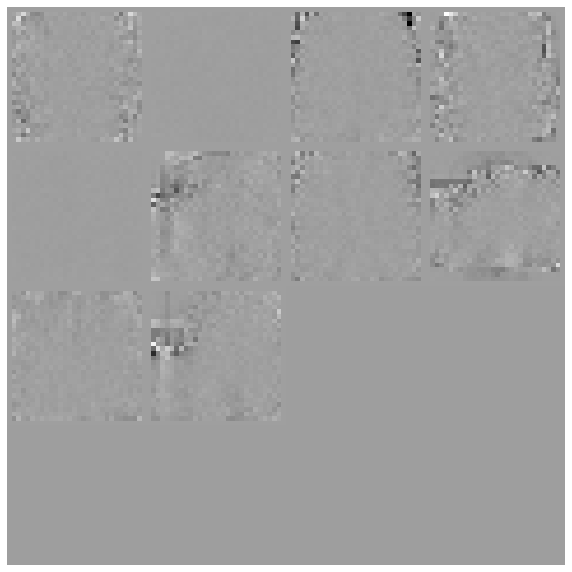

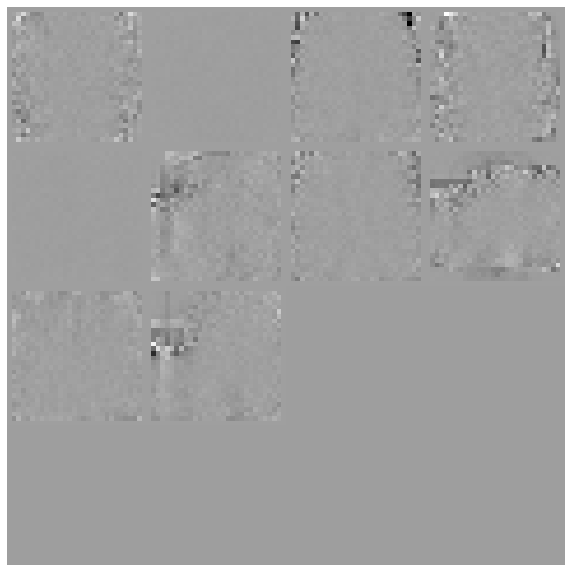

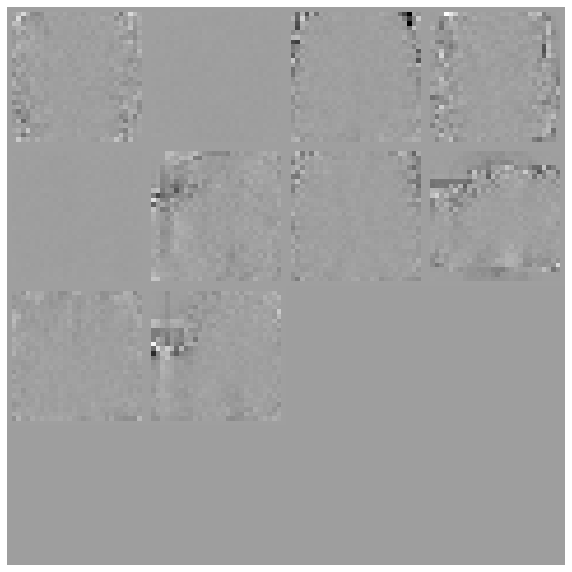

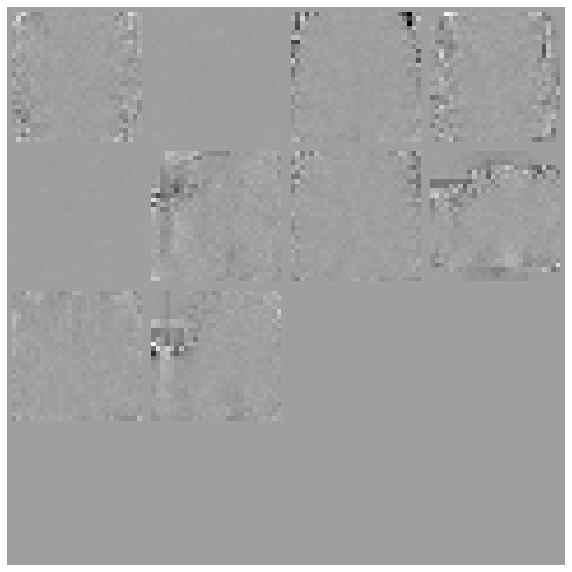

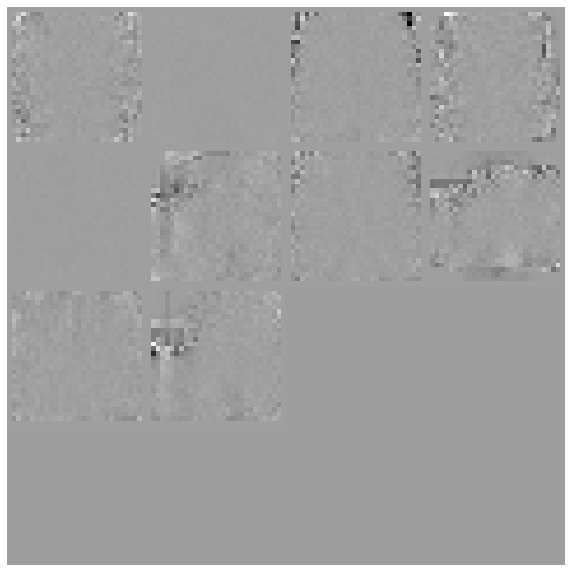

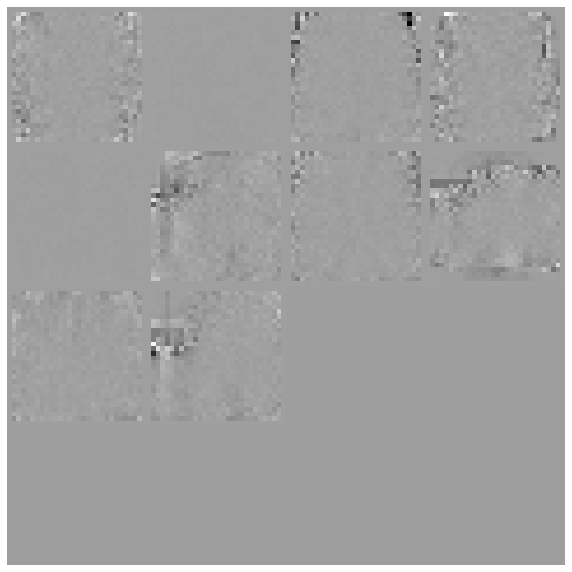

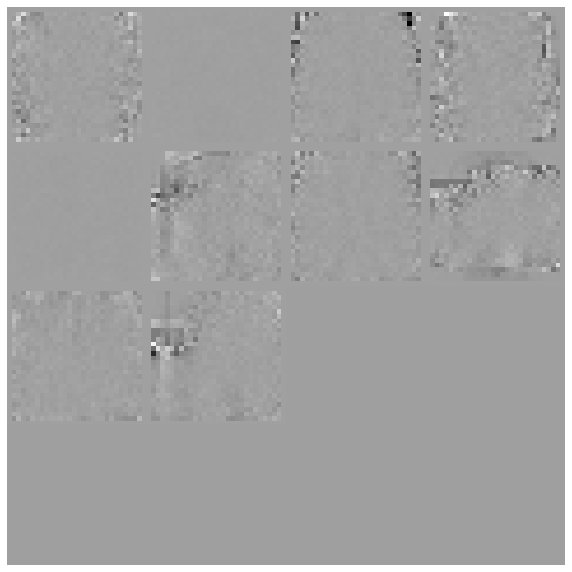

In [ ]:
wb.init(project="Simple_Linear_MNIST"); #weights and biases, measure how well is clasification happening, run 100000 times to keep having it improve itself, truncated numbers 784by10 and then use python optimzer tool, optimzer please update variable w  and lr will tell how quickly it will learn the solution,
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]
#building a classifier to decide where images go to
optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y) #measure how different they are, zero if match, larger number if do not match

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss}) 

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy()) #comes up with new whacky name every time

In [ ]:
e0b1c029bcade85b59fe7470bdaadc8e175e69e5

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing